### Loading all needed Libraries

In [2]:
"""
Imports necessary libraries for data manipulation, visualization, and statistical analysis:
    - json: For parsing JSON data.
    - requests: For making HTTP requests to access data from web APIs.
    - pandas: For data manipulation and analysis.
    - numpy: For numerical operations.
    - matplotlib.pyplot: For creating static, animated, and interactive visualizations.
    - mplfinance: For financial data visualization.
    - scipy.stats: For statistical analysis.
"""

import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import scipy.stats as st



### Define the list of Stocks:

    Top 19 AI Stocks:

      Nvidia Corporation (NVDA)
      Microsoft Corporation (MSFT)
      Alphabet Inc. (GOOGL)
      Amazon.com, Inc. (AMZN)
      Meta Platforms, Inc. (META)
      Taiwan Semiconductor Manufacturing Company Limited (TSM)
      ASML Holding N.V. (ASML)
      Adobe Inc. (ADBE)
      International Business Machines Corporation (IBM)
      Arista Networks Inc. (ANET)
      Broadcom Inc. (AVGO)
      Oracle Corporation (ORCL)
      SAP SE (SAP)
      Accenture plc (ACN)
      ServiceNow, Inc. (NOW)
      Intel Inc. (INTC)
      Advanced Micro Devices, Inc. (AMD)
      Palantir Technologies Inc. (PLTR)
      Arm Holdings plc (ARM)

In [3]:
"""
1. `ai_stocks_list`: A list of stock symbols for companies involved in artificial intelligence and technology that we will analyze.
    - Example symbols: 'NVDA', 'MSFT', 'GOOGL', 'AMZN', 'META', etc.
2. `market_index_list`: A list of market symbols for major market indices that we will benchmark against.
    - Example symbols: 'SPY', 'QQQ'
"""

ai_stocks_list = ['NVDA', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSM', 

                  'ASML', 'ADBE', 'IBM', 'ANET', 'AVGO', 'ORCL', 'SAP', 
                  'ACN', 'NOW', 'AMD', 'PLTR', 'ARM', 'INTC']

market_index_list =['SPY', 'QQQ']


### Get Data
#### Create the Access Token for the dataset

In [4]:
"""
This sets up the authorization header for making API requests.

Variables:
    access_token (str): The access token used for authentication in API requests.
    headers (dict): A dictionary containing the authorization header with the Bearer token.
"""

access_token = "eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCIsImtpZCI6Ik56WXpOekExUXpORVJFTXpNMFZHTkVSRVFqSTBSakV4TmpZek56aEdRVFJETmtJd1JVVXpNUSJ9.eyJodHRwOi8vdHJhZGVzdGF0aW9uLmNvbS9pZ25vcmVfZHVhbF9sb2dvbiI6ImZhbHNlIiwiaHR0cDovL3RyYWRlc3RhdGlvbi5jb20vY2xpZW50X3RhZyI6IlFvam0zIiwiaHR0cDovL3RyYWRlc3RhdGlvbi5jb20vdXNlcm5hbWUiOiJtYWZpYXQ5NSIsImh0dHA6Ly90cmFkZXN0YXRpb24uY29tL2ZkY25faWQiOiI4OTMzNTQ3IiwiaHR0cDovL3RyYWRlc3RhdGlvbi5jb20vY3J5cHRvX2lkIjoiZDhiYWExMzItZDM2Ny00NTAzLTg4YjktZDJhZjQ3NWNiYzkwIiwiaHR0cDovL3RyYWRlc3RhdGlvbi5jb20vb255eF9pZCI6Mjc2OTYyNCwiaXNzIjoiaHR0cHM6Ly9zaWduaW4udHJhZGVzdGF0aW9uLmNvbS8iLCJzdWIiOiJhdXRoMHw4OTMzNTQ3IiwiYXVkIjpbImh0dHBzOi8vYXBpLnRyYWRlc3RhdGlvbi5jb20iLCJodHRwczovL3RyYWRlc3RhdGlvbi1wcm9kLnRzbG9naW4uYXV0aDAuY29tL3VzZXJpbmZvIl0sImlhdCI6MTczNzU1NTM2NSwiZXhwIjoxNzM3NTU2NTY1LCJzY29wZSI6Im9wZW5pZCBwcm9maWxlIE1hcmtldERhdGEgUmVhZEFjY291bnQgVHJhZGUgTWF0cml4IE9wdGlvblNwcmVhZHMgb2ZmbGluZV9hY2Nlc3MiLCJhenAiOiJxbkVJdzlzVHdrSVVwS0ttQjE5RDJadmdQUkZvbUJmUiJ9.Yk42XTuCkN3_lgY5kovxLkQ6rU_zrIO16NfCSxqEINOCVNHv1eFPU1f7y698Pmk_UCl8upp9xpZe7NW5voRAyjKTXwCL4ceYLPyg7O7J3DNYw4Rcsa04z7uDDrSxXtXSteVRu-D2ArGzN_BS8EJf21SDHbUWYmfex0IKMUAL9L3IURIpFvmBIF9S581viczCJfPS1sYyZXK_j6a92sGiDiSaDHpSV7950OLS0rQsnEoWTxH-O4X3GfJwyQHwfyoRQg5qogdi6l0Z5AAI4ZXljun6_BDulVMMDCHJ6HW-qTceh5C1bbsxYGp_LsnyGbOmL2gKJmEVbOoyFDTlYzyP6w"
headers = {'Authorization': f'Bearer {access_token}' }

### Create the URLs

In [5]:
"""
This sets up the base URL and data length parameters for accessing bar chart market data from the TradeStation API.
Attributes:
    base_url (str): The base URL for the TradeStation API endpoint to retrieve bar chart market data.
    data_length (str): The query parameter specifying the number of bars to retrieve, set to 1000 bars back.
"""


base_url = "https://api.tradestation.com/v3/marketdata/barcharts/"
data_length = "?barsback=1000"



### Create a JSON Dictionary with for each Stocks

In [73]:
"""
Fetches stock data for AI stocks and market indices, and saves the data to JSON files.

This script performs the following steps:
1. Fetches data for each stock in `ai_stocks_list` from the specified `base_url` and stores the results in `ai_stocks_data_dict`.
2. Fetches data for each stock in `market_index_list` from the specified `base_url` and stores the results in `market_index_list_data_dict`.
3. Saves the `ai_stocks_data_dict` to a JSON file named 'ai_stocks_data_dict.json'.
4. Saves the `market_index_list_data_dict` to a JSON file named 'market_index_list_data_dict.json'.

Variables:
- ai_stocks_list (list): List of AI stock symbols to fetch data for.
- market_index_list (list): List of market index symbols to fetch data for.
- base_url (str): Base URL for the API endpoint.
- data_length (str): Query parameter to specify the length of data to fetch.
- headers (dict): Headers to include in the API request.

Files:
- ai_stocks_data_dict.json: JSON file containing the fetched AI stocks data.
- market_index_list_data_dict.json: JSON file containing the fetched market index data.
"""


ai_stocks_data_dict = {stock: requests.get(f"{base_url}{stock}{data_length}", headers=headers).json() for stock in ai_stocks_list}
market_index_list_data_dict = {stock: requests.get(f"{base_url}{stock}{data_length}", headers=headers).json() for stock in market_index_list}

with open('ai_stocks_data_dict.json', 'w') as f:
    json.dump(ai_stocks_data_dict, f)

with open('market_index_list_data_dict.json', 'w') as f:
    json.dump(market_index_list_data_dict, f)



### Load Saved JSON for Each Stock

In [6]:
"""
This loads AI stocks data and market index list data from JSON files.
Variables:
    ai_stocks_data_dict (dict): Additional AI stocks data loaded from 'ai_stocks_data_dict.json'.
    market_index_list_data_dict (dict): Additional market index list data loaded from 'market_index_list_data_dict.json'.
"""

ai_stocks_data_dict = json.load(open('ai_stocks_data_dict.json'))
market_index_list_data_dict = json.load(open('market_index_list_data_dict.json'))

### Create Dataframe from the Dictionary

In [7]:
"""
Creates dataframes from dictionaries containing stock and market index data.

The function processes two dictionaries:
1. `ai_stocks_data_dict`: A dictionary where keys are stock symbols and values are dictionaries containing stock data.
2. `market_index_list_data_dict`: A dictionary where keys are market index symbols and values are dictionaries containing market index data.

Returns:
    ai_stocks_df_dict (dict): A dictionary where keys are stock symbols and values are pandas DataFrames created from the 'Bars' data.
    market_index_list_df_dict (dict): A dictionary where keys are market index symbols and values are pandas DataFrames created from the 'Bars' data.
"""

ai_stocks_df_dict = {symbol: pd.DataFrame(data['Bars']) for symbol, data in ai_stocks_data_dict.items()}
market_index_list_df_dict = {symbol: pd.DataFrame(data['Bars']) for symbol, data in market_index_list_data_dict.items()}


### Cleanse the Stocks data

In [8]:
"""
This script processes and cleans stock and market index data stored in dictionaries of DataFrames.
The following steps are performed for each DataFrame in the dictionaries:
1. Selects specific columns: 'TimeStamp', 'High', 'Low', 'Open', 'Close', 'TotalVolume'.
2. Converts the 'TimeStamp' column to datetime format.
3. Converts 'High', 'Low', 'Open', 'Close', and 'TotalVolume' columns to float.
4. Sets the 'TimeStamp' column as the index.
5. Renames the 'TotalVolume' column to 'Volume'.
Variables:
    ai_stocks_df_dict (dict): Dictionary containing stock data DataFrames.
    market_index_list_df_dict (dict): Dictionary containing market index data DataFrames.
    ai_stocks_df_dict_clean (dict): Dictionary containing cleaned stock data DataFrames.
    market_index_list_df_dict_clean (dict): Dictionary containing cleaned market index data DataFrames.
"""


ai_stocks_df_dict_clean = {symbol: data[['TimeStamp','High', 'Low', 'Open', 'Close', 'TotalVolume']] for symbol, data in ai_stocks_df_dict.items()}
market_index_list_df_dict_clean = {symbol: data[['TimeStamp','High', 'Low', 'Open', 'Close', 'TotalVolume']] for symbol, data in market_index_list_df_dict.items()}

for symbol, stock_data in ai_stocks_df_dict_clean.items():
    stock_data.loc[:,'TimeStamp'] = pd.to_datetime(stock_data['TimeStamp'])
    stock_data.loc[:,'High'] = stock_data['High'].astype(float)
    stock_data.loc[:,'Low'] = stock_data['Low'].astype(float)
    stock_data.loc[:,'Open'] = stock_data['Open'].astype(float)
    stock_data.loc[:,'Close'] = stock_data['Close'].astype(float)
    stock_data.loc[:,'TotalVolume'] = stock_data['TotalVolume'].astype(float)
    stock_data = stock_data.set_index('TimeStamp')
    stock_data.rename(columns={'TotalVolume': 'Volume'}, inplace=True)
    ai_stocks_df_dict_clean[symbol] = stock_data

for symbol, index_data in market_index_list_df_dict_clean.items():
    index_data.loc[:,'TimeStamp'] = pd.to_datetime(index_data['TimeStamp'])
    index_data.loc[:,'High'] = index_data['High'].astype(float)
    index_data.loc[:,'Low'] = index_data['Low'].astype(float)
    index_data.loc[:,'Open'] = index_data['Open'].astype(float)
    index_data.loc[:,'Close'] = index_data['Close'].astype(float)
    index_data.loc[:,'TotalVolume'] = index_data['TotalVolume'].astype(float)
    index_data = index_data.set_index('TimeStamp')
    index_data.rename(columns={'TotalVolume': 'Volume'}, inplace=True)
    market_index_list_df_dict_clean[symbol] = index_data



c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old beha

### Create Correlation Analysis

#### Correlation with SPY and QQQ


In [9]:
"""
This script calculates the correlation of AI stocks with SPY and QQQ market indices.
The script performs the following steps:
1. Initializes an empty dictionary to store the correlation results.
2. Iterates over a list of AI stock symbols.
3. For each stock symbol, calculates the Pearson correlation coefficient between the stock's closing prices and the closing prices of SPY and QQQ over the last 200 trading days.
4. Rounds the correlation coefficients to two decimal places.
5. Appends the stock symbol and the rounded correlation coefficients to the correlation data dictionary.
6. Converts the correlation data dictionary to a pandas DataFrame and sorts it by stock symbol in ascending order.
7. Displays the resulting DataFrame.
Variables:
    ai_stocks_list (list): List of AI stock symbols.
    ai_stocks_df_dict_clean (dict): Dictionary containing cleaned DataFrames of AI stocks.
    market_index_list_df_dict_clean (dict): Dictionary containing cleaned DataFrames of market indices (SPY and QQQ).
    correlation_data (dict): Dictionary to store the correlation results.
    correlation_df (pd.DataFrame): DataFrame containing the sorted correlation results.
Returns:
    pd.DataFrame: A DataFrame containing the stock symbols and their correlations with SPY and QQQ, sorted by stock symbol.
"""

correlation_data = { 
        
            'Stock': [], 
            'Correlation with SPY': [], 
            'Correlation with QQQ': []
            }


for symbol in ai_stocks_list:
    
    correlation_with_SPY, _ = st.pearsonr(ai_stocks_df_dict_clean[symbol].iloc[-200:]['Close'], market_index_list_df_dict_clean['SPY'].iloc[-200:]['Close'])
    correlation_with_QQQ, _ = st.pearsonr(ai_stocks_df_dict_clean[symbol].iloc[-200:]['Close'], market_index_list_df_dict_clean['QQQ'].iloc[-200:]['Close'])

    rounded_correlation_with_SPY = round(correlation_with_SPY, 2)
    rounded_correlation_with_QQQ = round(correlation_with_QQQ, 2)

    correlation_data['Stock'].append(symbol)
    correlation_data['Correlation with SPY'].append(rounded_correlation_with_SPY)
    correlation_data['Correlation with QQQ'].append(rounded_correlation_with_QQQ)

correlation_df = pd.DataFrame(correlation_data).sort_values(by='Stock', ascending=True)

correlation_df.set_index('Stock', inplace=True)

correlation_df

# Define a function to apply color based on correlation value
def color_correlation(val):
    if val > 0.8:
        color = 'color: green'
    elif val < -0.8:
        color = 'color: red'
    else:
        color = ''
    return color

# Apply the function to the correlation DataFrame
styled_correlation_df = correlation_df.style.format({
    'Correlation with SPY': '{:.2f}',
    'Correlation with QQQ': '{:.2f}'
}).applymap(color_correlation, subset=['Correlation with SPY', 'Correlation with QQQ'])





# Display the styled DataFrame
styled_correlation_df



C:\Users\Afiat_Trading\AppData\Local\Temp\ipykernel_50024\299415541.py:61: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  }).applymap(color_correlation, subset=['Correlation with SPY', 'Correlation with QQQ'])


### Correlation between Stocks

In [10]:
# Create a DataFrame to store the closing prices of all stocks
"""
This script performs the following tasks:
1. Creates a DataFrame to store the closing prices of all stocks from a dictionary of cleaned stock data.
2. Calculates the correlation matrix for the closing prices of the stocks.
3. Defines a function to apply color formatting based on the correlation value:
    - Green for correlation values greater than 0.9
    - Red for correlation values less than -0.9
    - No color for other values
4. Applies the color formatting function to the correlation matrix.
5. Displays the correlation matrix.
6. Displays the styled correlation matrix with color formatting.
Functions:
- color_correlation(val): Returns a string with CSS color formatting based on the correlation value.
"""
closing_prices = pd.DataFrame({symbol: ai_stocks_df_dict_clean[symbol]['Close'] for symbol in ai_stocks_list})

# Calculate the correlation matrix
correlation_matrix = closing_prices.corr()

# Define a function to apply color based on correlation value
def color_correlation(val):
    if val > 0.9:
        color = 'color: green'
    elif val < -0.9:
        color = 'color: red'
    else:
        color = ''
    return color

# Apply the function to the correlation matrix
styled_correlation_matrix = correlation_matrix.style.format(precision=2).applymap(color_correlation)

# Display the styled correlation matrix
styled_correlation_matrix

C:\Users\Afiat_Trading\AppData\Local\Temp\ipykernel_50024\1035912365.py:32: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_correlation_matrix = correlation_matrix.style.format(precision=2).applymap(color_correlation)


### Performance Analysis

In [13]:
"""
This script calculates the 52-week and 12-week performance of a list of AI stocks and stores the results in a DataFrame.
Variables:
    performance_data (dict): A dictionary to store stock symbols and their respective performance data.
        - 'Stock' (list): List of stock symbols.
        - '52 Weeks Performance' (list): List of 52-week performance percentages.
        - '12 Weeks Performance' (list): List of 12-week performance percentages.
    ai_stocks_list (list): A list of stock symbols to analyze.
    ai_stocks_df_dict_clean (dict): A dictionary where keys are stock symbols and values are DataFrames containing stock data.
    performance_df (DataFrame): A DataFrame containing the performance data for each stock, sorted by stock symbol.
Process:
    1. Iterate over each stock symbol in ai_stocks_list.
    2. Retrieve the stock data from ai_stocks_df_dict_clean.
    3. Calculate the 52-week performance as the percentage change in the closing price from 252 trading days ago to the most recent closing price.
    4. Calculate the 12-week performance as the percentage change in the closing price from 58 trading days ago to the most recent closing price.
    5. Round the performance values to two decimal places.
    6. Append the stock symbol and its performance data to the performance_data dictionary.
    7. Create a DataFrame from the performance_data dictionary and sort it by stock symbol.
"""

performance_data = { 
    'Stock': [], 
    '52 Weeks Performance': [], 
    '12 Weeks Performance': []            
}


for symbol in ai_stocks_list:
    
    stock_data = ai_stocks_df_dict_clean[symbol]
    
    perf_52W = (stock_data.iloc[-1]['Close'] / stock_data.iloc[-252]['Close'] - 1) * 100
    perf_12W = (stock_data.iloc[-1]['Close'] / stock_data.iloc[-58]['Close'] - 1) * 100
    
    rounded_perf_52W = round(perf_52W, 2)
    rounded_perf_12W = round(perf_12W, 2)

    performance_data['Stock'].append(symbol)
    performance_data['52 Weeks Performance'].append(rounded_perf_52W)
    performance_data['12 Weeks Performance'].append(rounded_perf_12W)

performance_df = pd.DataFrame(performance_data).sort_values(by='52 Weeks Performance', ascending=False)
performance_df.reset_index(drop=True, inplace=True)
performance_df.set_index('Stock', inplace=True)

performance_df

52 Weeks Performance  12 Weeks Performance
Stock                                            
PLTR                 335.46                 62.88
NVDA                 136.73                 -0.50
AVGO                  98.41                 38.91
ARM                   97.51                  7.97
TSM                   91.51                  7.50
ANET                  84.43                 23.33
SAP                   64.75                 13.29
META                  60.77                  7.54
ORCL                  57.35                 -0.55
AMZN                  48.52                 22.83
NOW                   46.42                 15.35
GOOGL                 35.30                 19.83
IBM                   30.78                  4.47
MSFT                   7.48                  0.08
ASML                   0.68                  7.21
ACN                   -2.06                 -1.21
ADBE                 -28.65                 -9.79
AMD                  -29.82                -21.73
INTC                 -54.79                 -4.01

#### 52 weeks Performance Charts

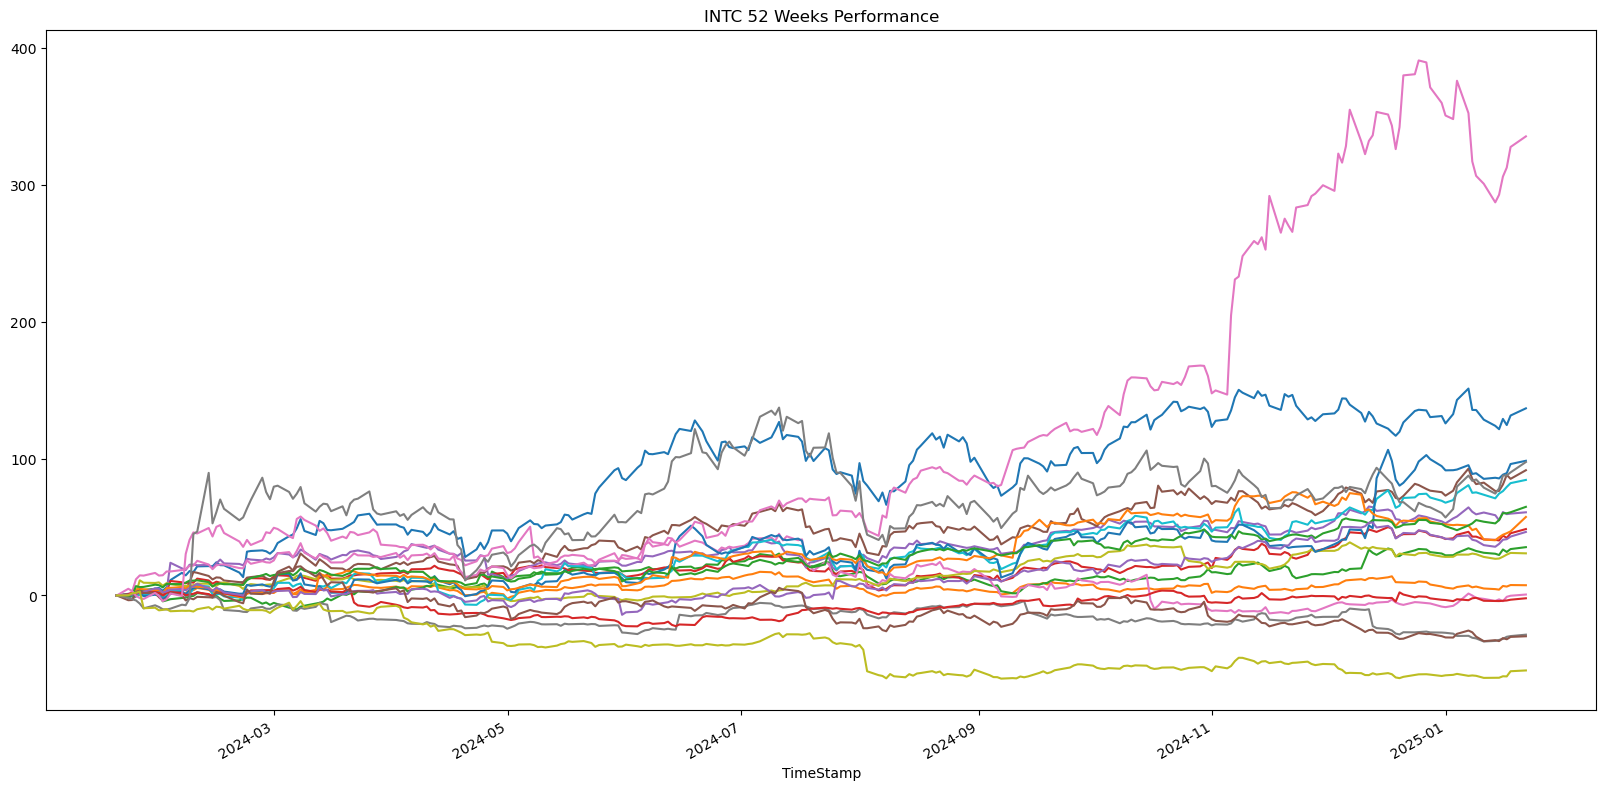

In [14]:
"""
This script calculates and plots the cumulative performance of a list of AI stocks over the past 52 weeks.
Variables:
    cumm_performance (pd.DataFrame): An empty DataFrame to store the cumulative performance of each stock.
    symbol (str): The stock symbol for each stock in the ai_stocks_list.
    anchor_price (float): The closing price of the stock 252 trading days ago (approximately one year).
    plot (matplotlib.axes._subplots.AxesSubplot): The plot object for the cumulative performance of each stock.
Procedure:
    1. Iterate over each stock symbol in the ai_stocks_list.
    2. Retrieve the closing price of the stock from 252 trading days ago and set it as the anchor price.
    3. Calculate the cumulative performance of the stock over the past 252 trading days as a percentage.
    4. Plot the cumulative performance of the stock with a title indicating the stock symbol and the time period.
"""

cumm_performance = pd.DataFrame()

for symbol in ai_stocks_list:

    anchor_price = ai_stocks_df_dict_clean[symbol].iloc[-252]['Close']
    cumm_performance[symbol] = ((ai_stocks_df_dict_clean[symbol].iloc[-252:]['Close'] / anchor_price) -1 )* 100

    plot = cumm_performance[symbol].plot(title=f'{symbol} 52 Weeks Performance', figsize=(20,10))
    

#### 52 weeks Performance Chart

<Axes: title={'center': 'NVDA 12 Weeks Performance'}, xlabel='TimeStamp'>

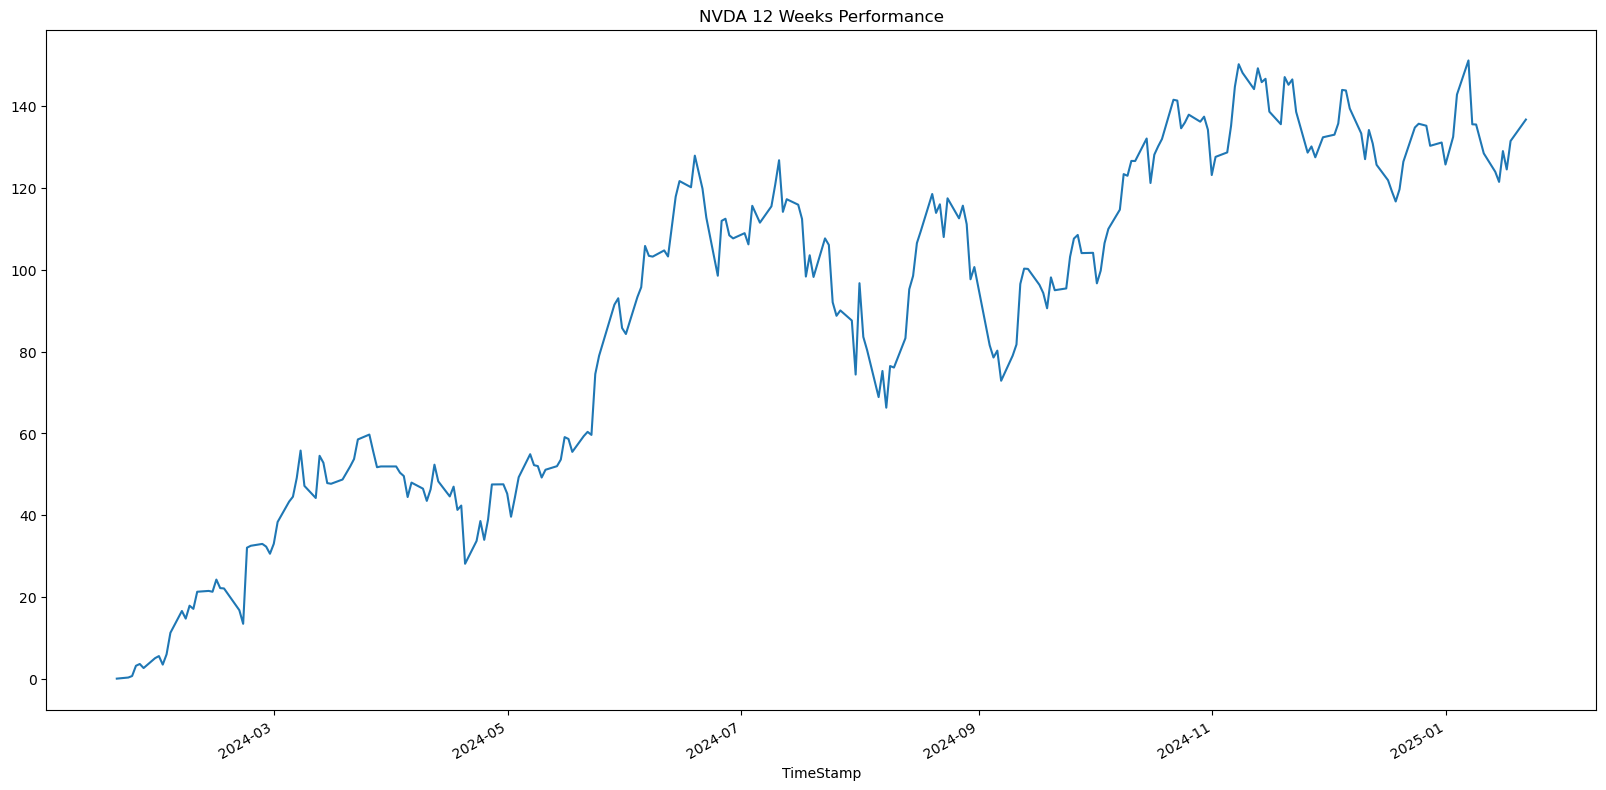

In [15]:
"""
This script calculates and plots the cumulative performance of a stock over the last 52 weeks.
Variables:
    anchor_price (float): The closing price of the stock 252 trading days ago (approximately 52 weeks).
    cumm_performance (pd.Series): The cumulative performance of the stock over the last 252 trading days, 
                                  calculated as the percentage change from the anchor price.
Functions:
    cumm_performance.plot(): Plots the cumulative performance of the stock with a title and specified figure size.
"""

anchor_price = ai_stocks_df_dict_clean[ai_stocks_list[0]].iloc[-252]['Close']
cumm_performance = ((ai_stocks_df_dict_clean[ai_stocks_list[0]].iloc[-252:]['Close'] / anchor_price) -1 )* 100
cumm_performance.plot(title=f'{ai_stocks_list[0]} 12 Weeks Performance', figsize=(20,10))

#### 12 weeks Performance Chart

<Axes: title={'center': 'NVDA 12 Weeks Performance'}, xlabel='TimeStamp'>

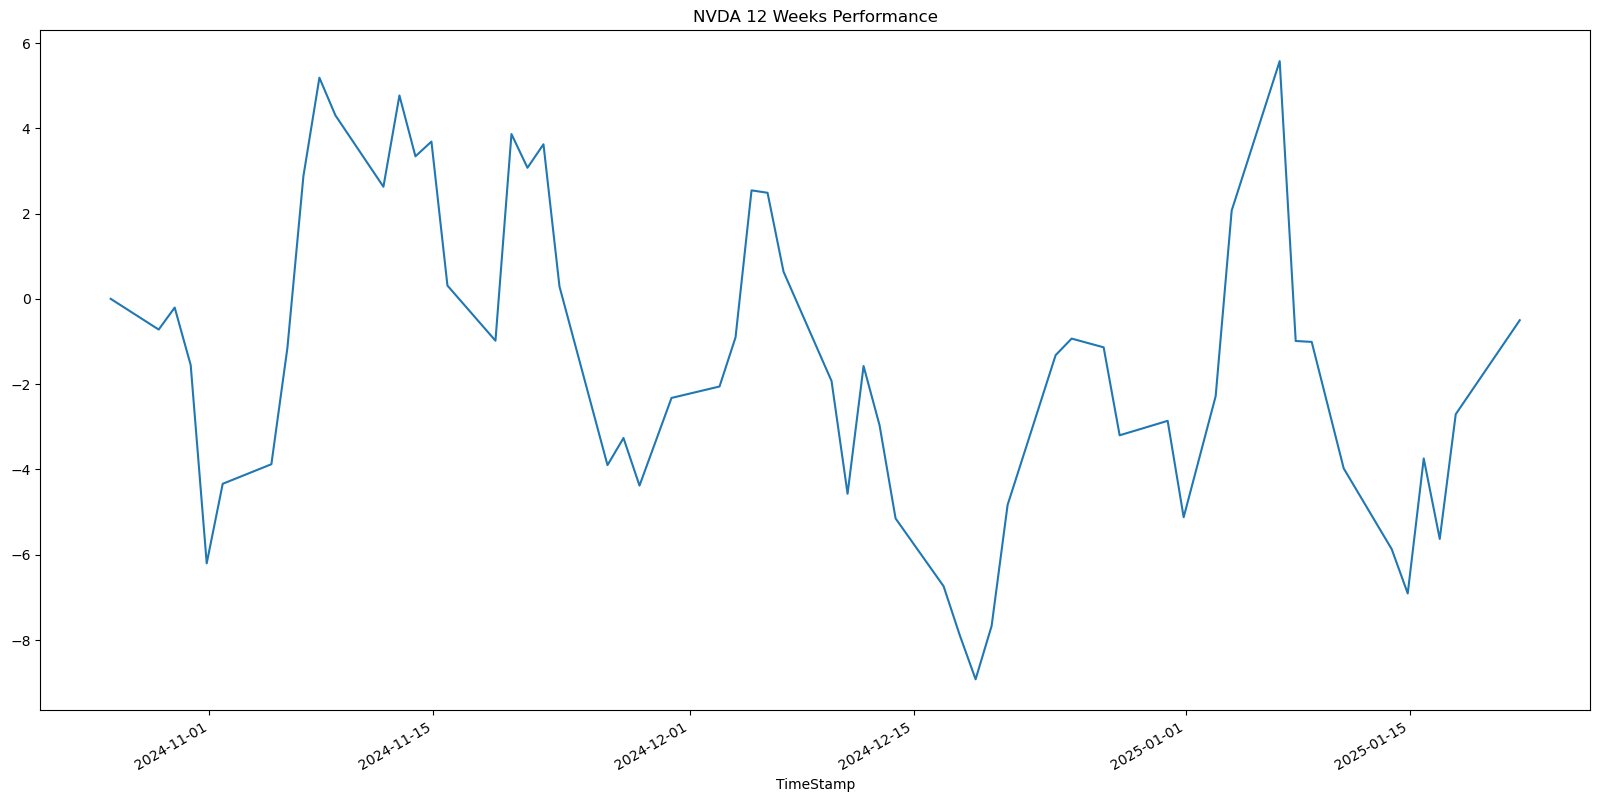

In [16]:
"""
This code snippet calculates and plots the cumulative performance of a stock over the last 12 weeks.
Variables:
- anchor_price: The closing price of the stock 58 days ago, used as a reference point for calculating performance.
- cumm_performance: A pandas Series representing the cumulative performance of the stock over the last 58 days, 
    calculated as the percentage change from the anchor_price.
Functions:
- cumm_performance.plot(): Plots the cumulative performance of the stock with a title indicating the stock symbol 
    and the performance period, and sets the figure size to 20x10 inches.
Dependencies:
- ai_stocks_df_dict_clean: A dictionary containing cleaned dataframes of stock prices.
- ai_stocks_list: A list of stock symbols.
"""

anchor_price = ai_stocks_df_dict_clean[ai_stocks_list[0]].iloc[-58]['Close']
cumm_performance = ((ai_stocks_df_dict_clean[ai_stocks_list[0]].iloc[-58:]['Close'] / anchor_price) -1 )* 100
cumm_performance.plot(title=f'{ai_stocks_list[0]} 12 Weeks Performance', figsize=(20,10))


### Perform Seasonality Analysis

### Use Prophet to Forecast the Future

18:33:13 - cmdstanpy - INFO - Chain [1] start processing


Note: you may need to restart the kernel to use updated packages.


18:33:13 - cmdstanpy - INFO - Chain [1] done processing


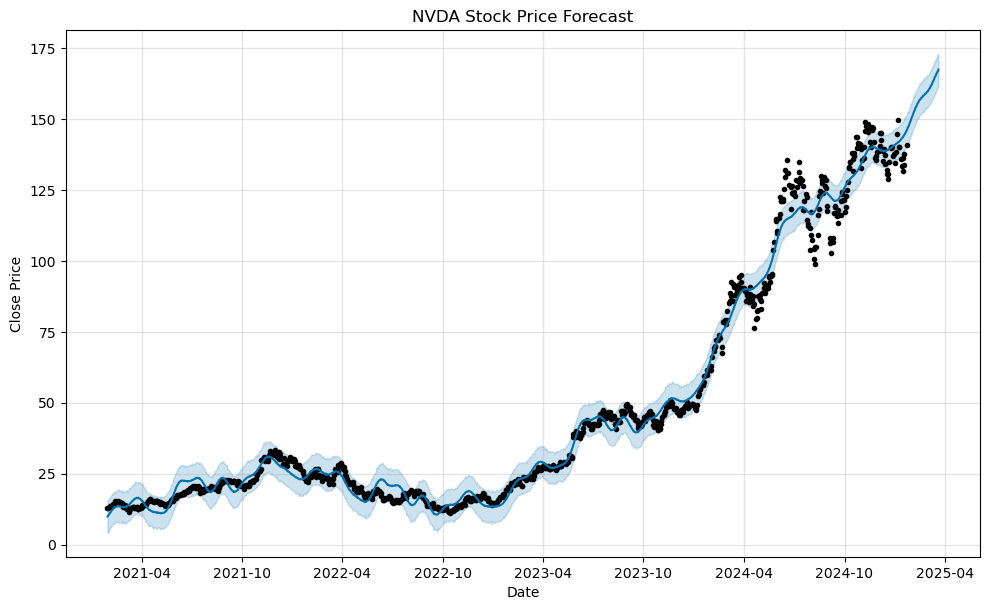

18:33:13 - cmdstanpy - INFO - Chain [1] start processing
18:33:13 - cmdstanpy - INFO - Chain [1] done processing


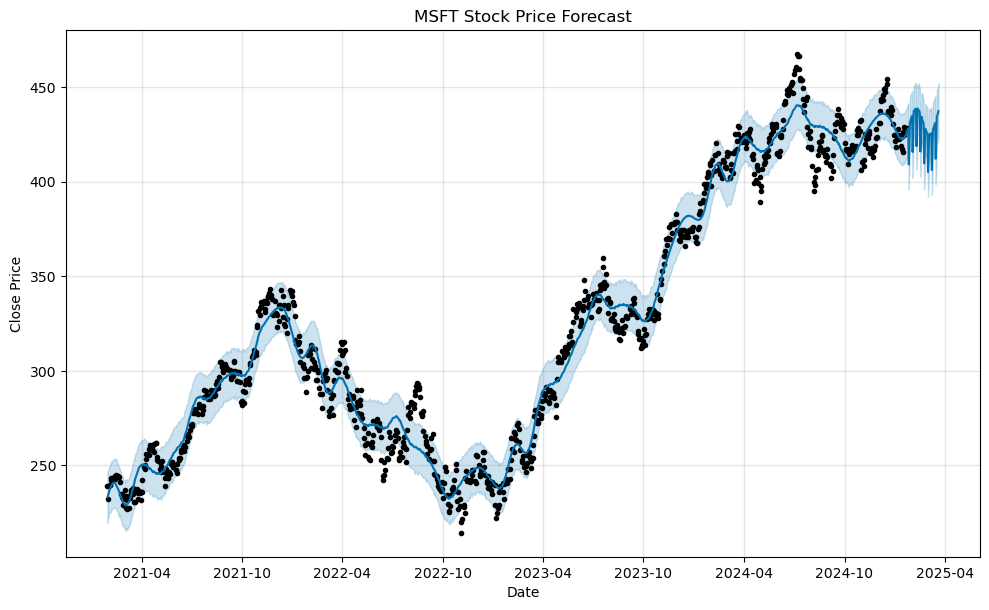

18:33:14 - cmdstanpy - INFO - Chain [1] start processing
18:33:14 - cmdstanpy - INFO - Chain [1] done processing


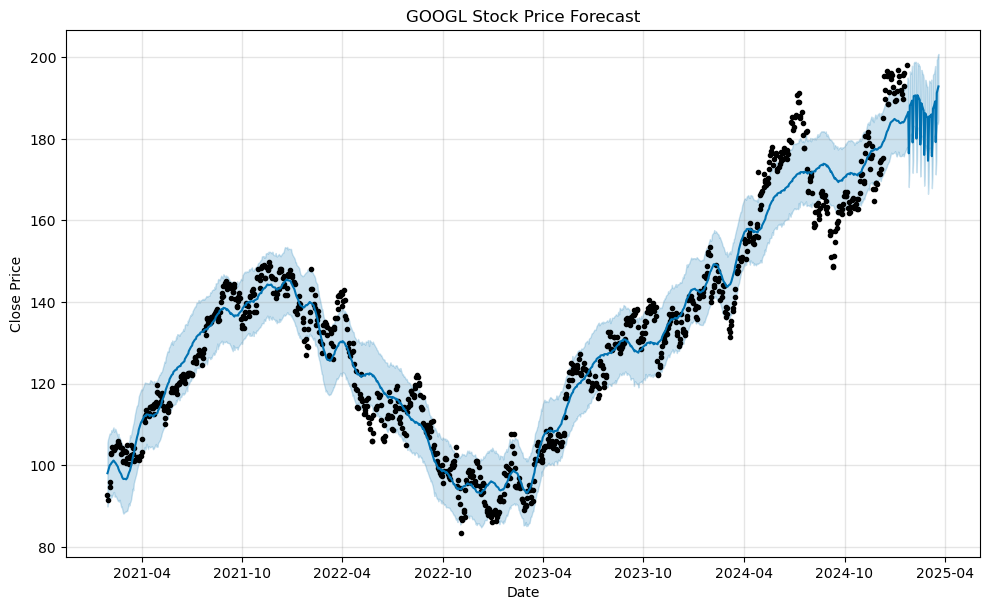

18:33:14 - cmdstanpy - INFO - Chain [1] start processing
18:33:14 - cmdstanpy - INFO - Chain [1] done processing


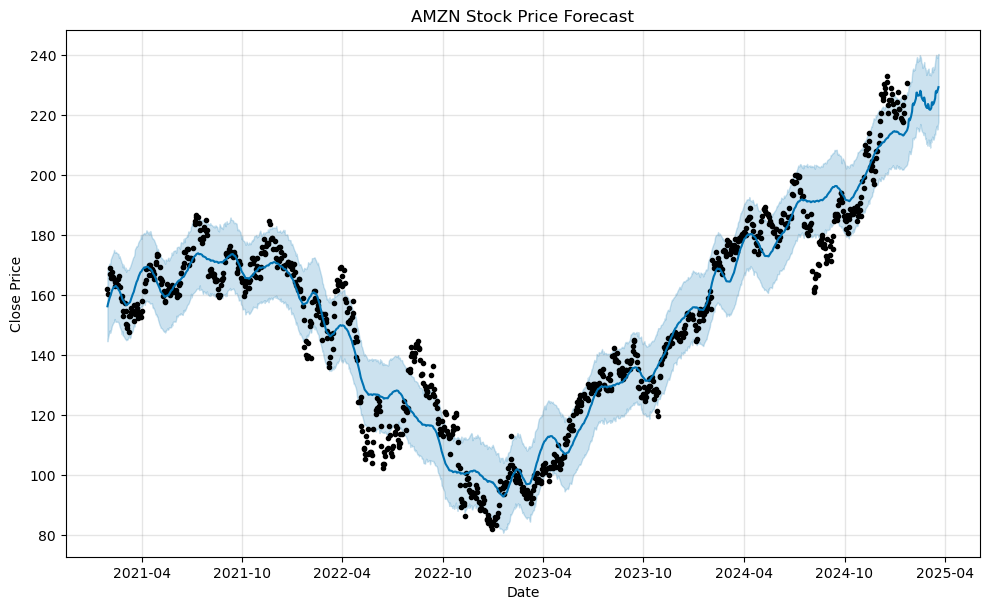

18:33:14 - cmdstanpy - INFO - Chain [1] start processing
18:33:15 - cmdstanpy - INFO - Chain [1] done processing


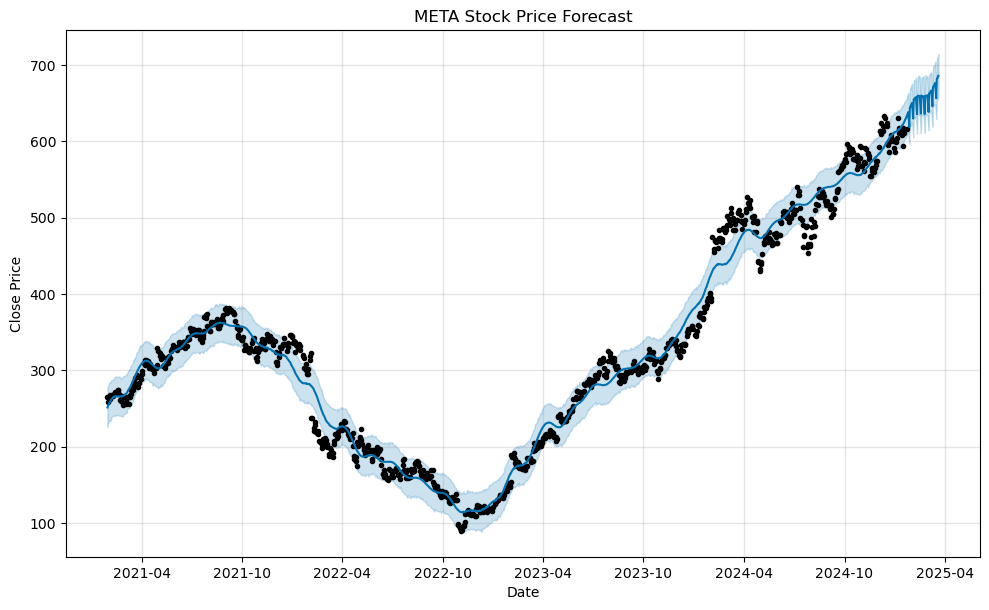

18:33:15 - cmdstanpy - INFO - Chain [1] start processing
18:33:15 - cmdstanpy - INFO - Chain [1] done processing


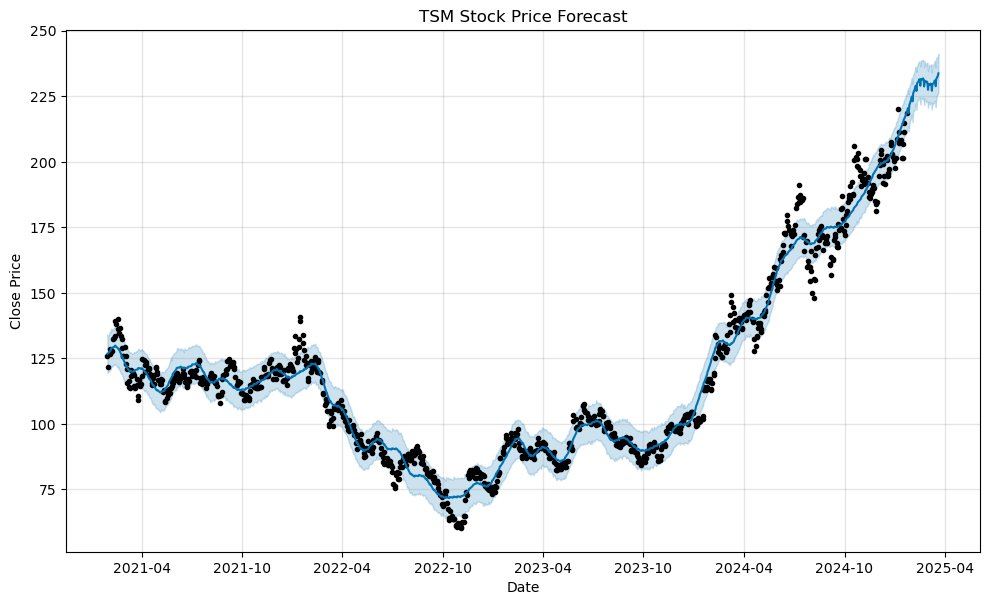

18:33:15 - cmdstanpy - INFO - Chain [1] start processing
18:33:15 - cmdstanpy - INFO - Chain [1] done processing


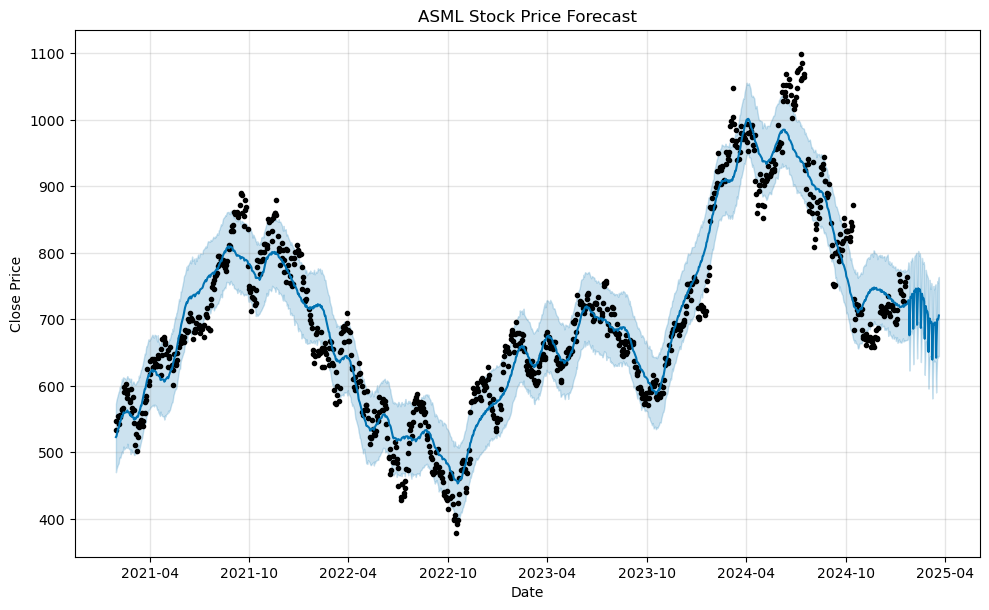

18:33:16 - cmdstanpy - INFO - Chain [1] start processing
18:33:16 - cmdstanpy - INFO - Chain [1] done processing


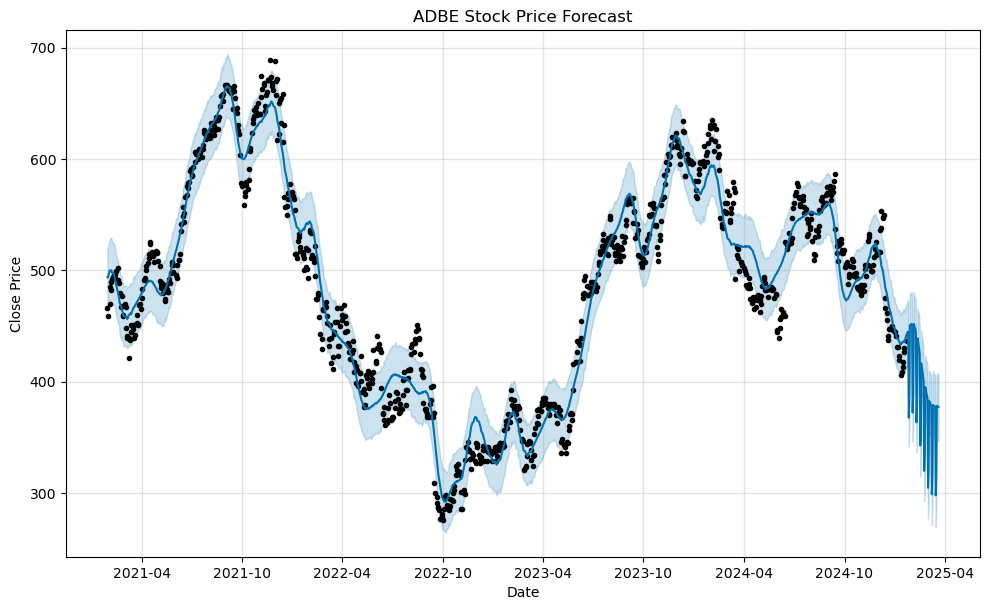

18:33:16 - cmdstanpy - INFO - Chain [1] start processing
18:33:16 - cmdstanpy - INFO - Chain [1] done processing


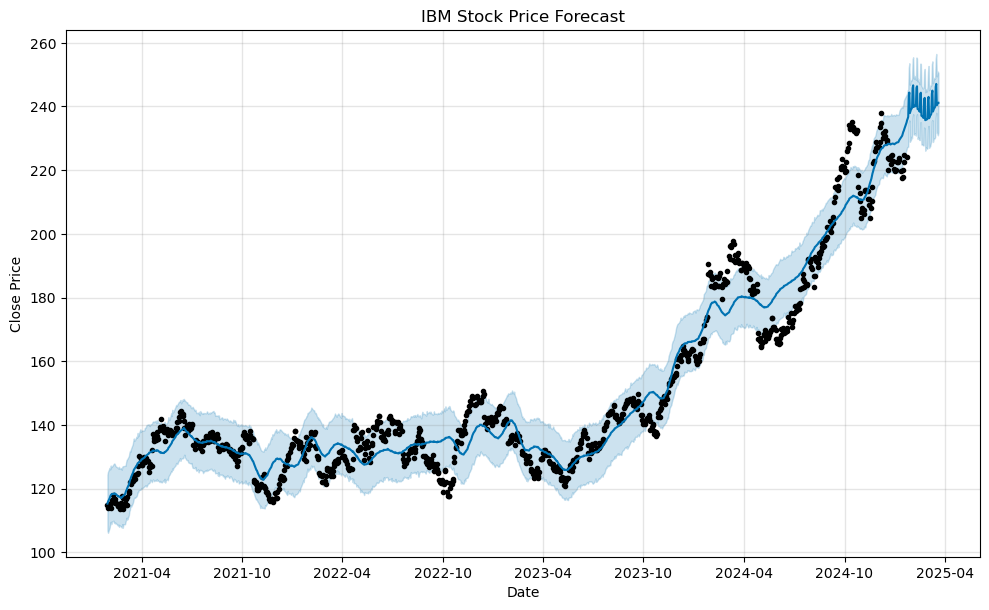

18:33:16 - cmdstanpy - INFO - Chain [1] start processing
18:33:17 - cmdstanpy - INFO - Chain [1] done processing


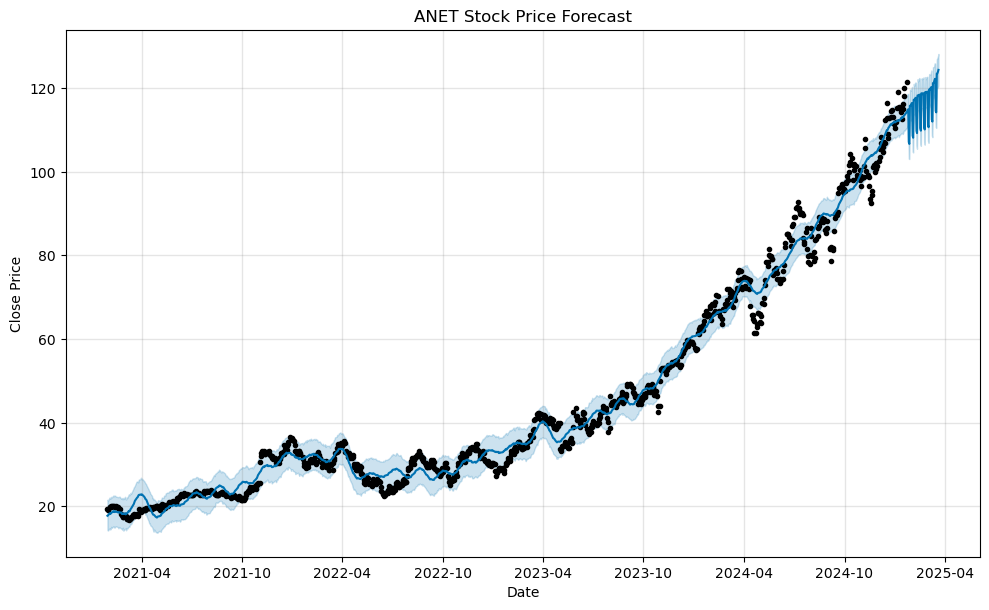

18:33:17 - cmdstanpy - INFO - Chain [1] start processing
18:33:17 - cmdstanpy - INFO - Chain [1] done processing


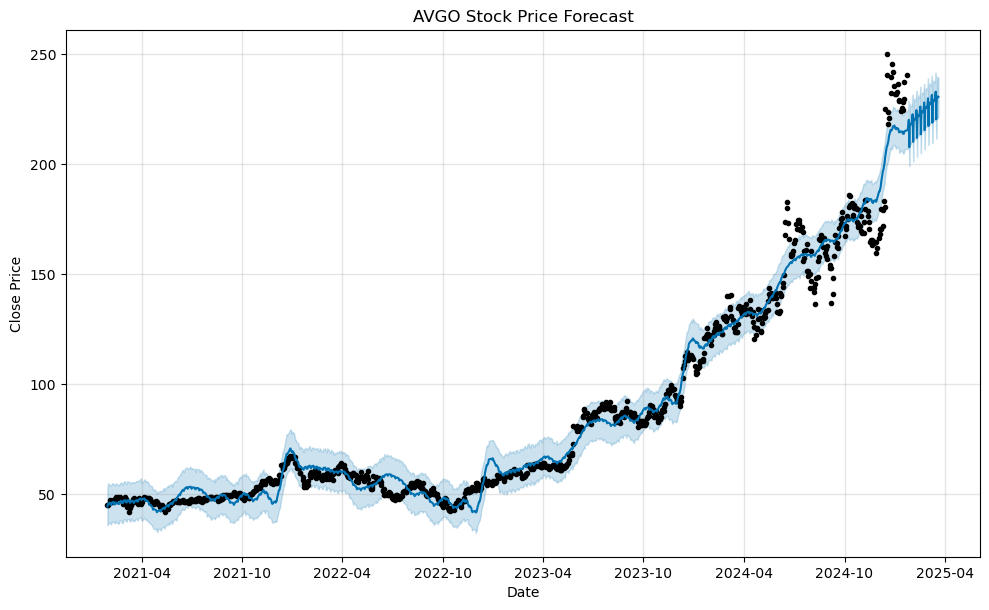

18:33:17 - cmdstanpy - INFO - Chain [1] start processing
18:33:17 - cmdstanpy - INFO - Chain [1] done processing


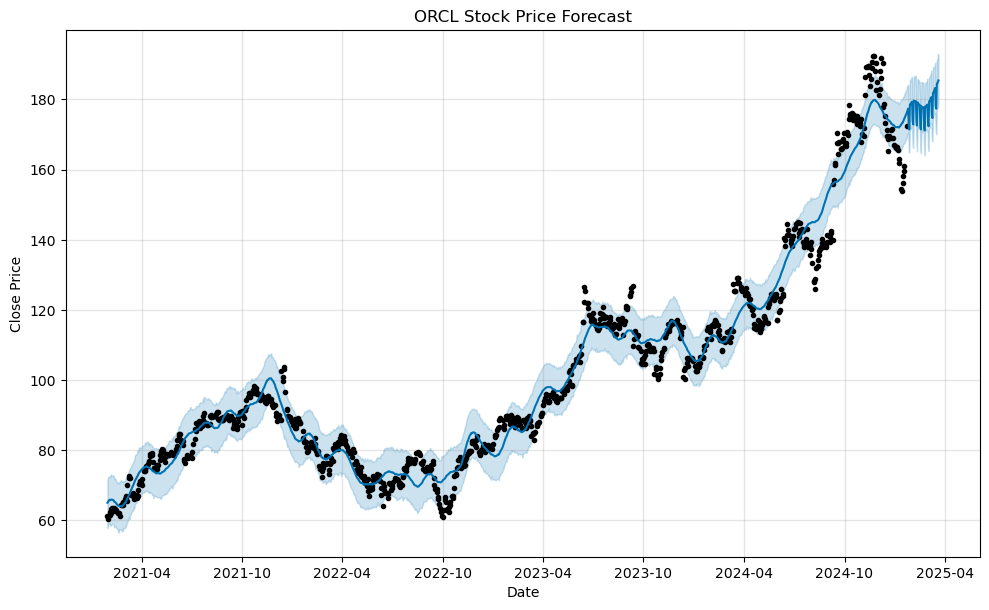

18:33:18 - cmdstanpy - INFO - Chain [1] start processing
18:33:18 - cmdstanpy - INFO - Chain [1] done processing


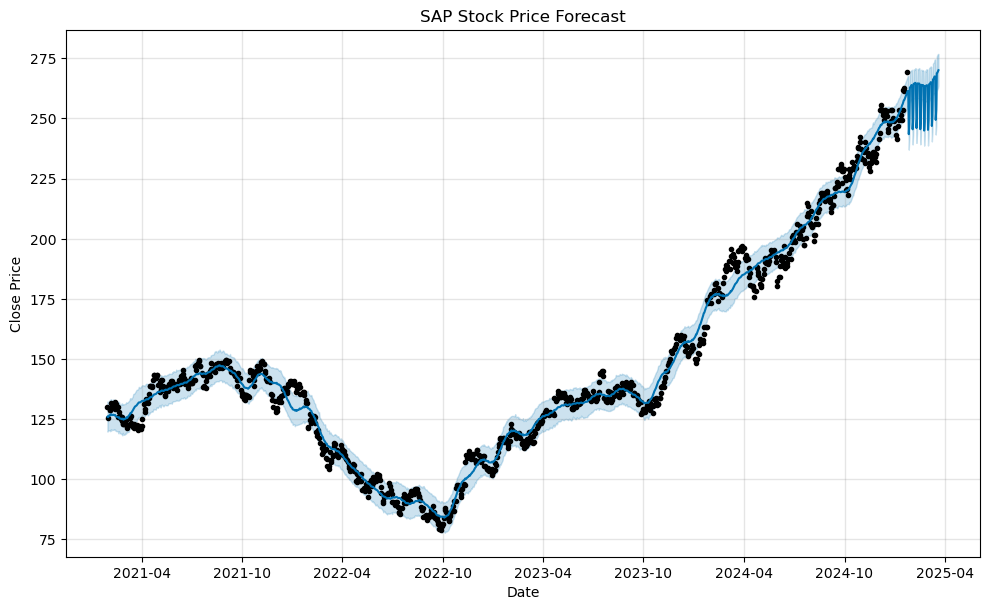

18:33:18 - cmdstanpy - INFO - Chain [1] start processing
18:33:18 - cmdstanpy - INFO - Chain [1] done processing


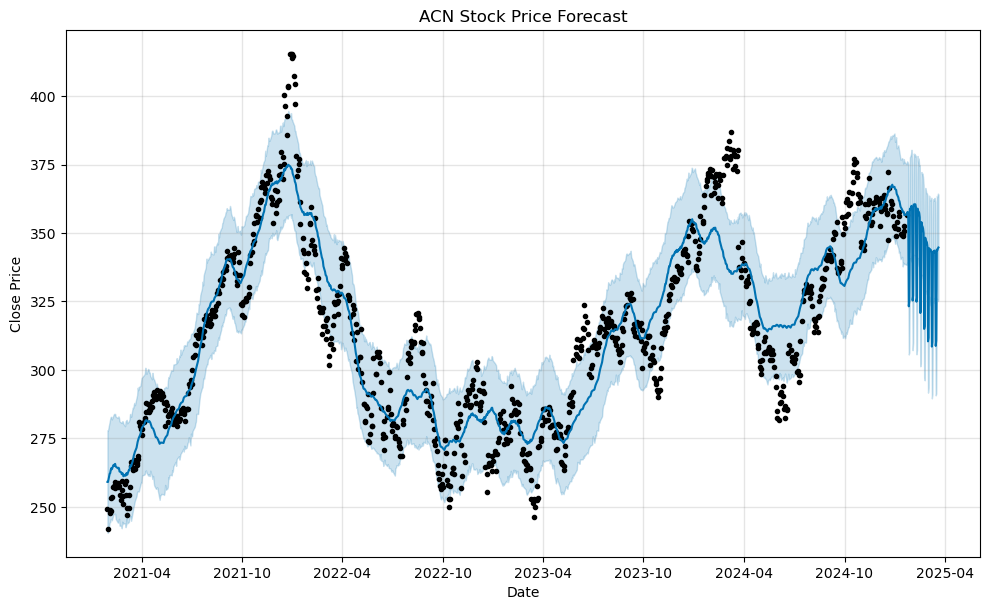

18:33:19 - cmdstanpy - INFO - Chain [1] start processing
18:33:19 - cmdstanpy - INFO - Chain [1] done processing


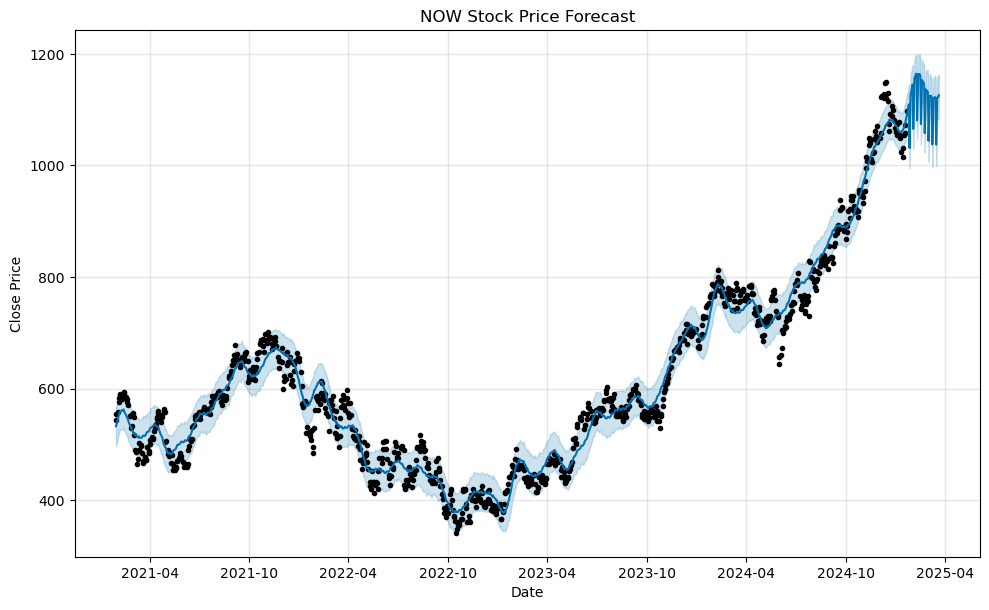

18:33:19 - cmdstanpy - INFO - Chain [1] start processing
18:33:19 - cmdstanpy - INFO - Chain [1] done processing


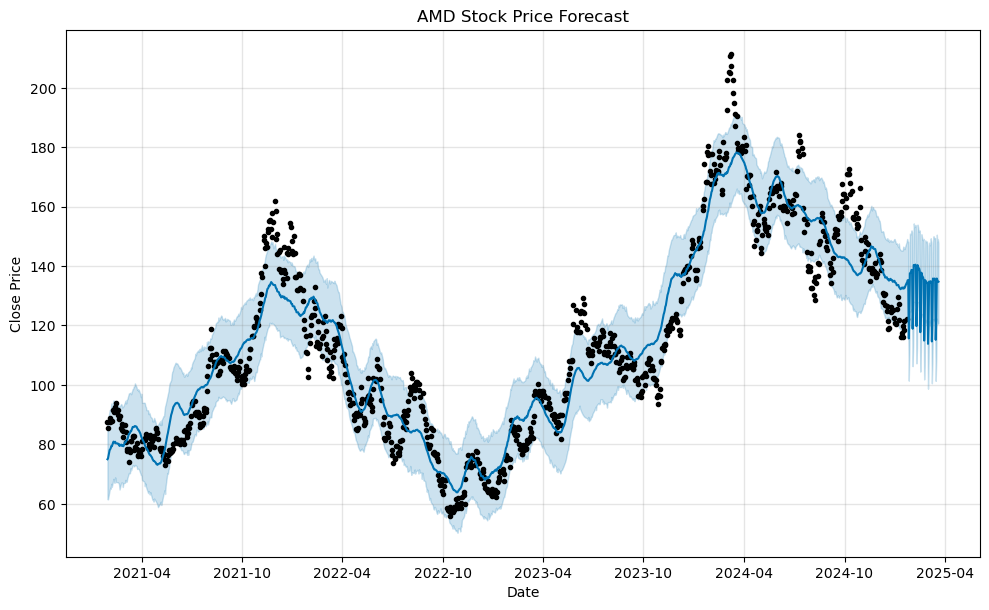

18:33:19 - cmdstanpy - INFO - Chain [1] start processing
18:33:19 - cmdstanpy - INFO - Chain [1] done processing


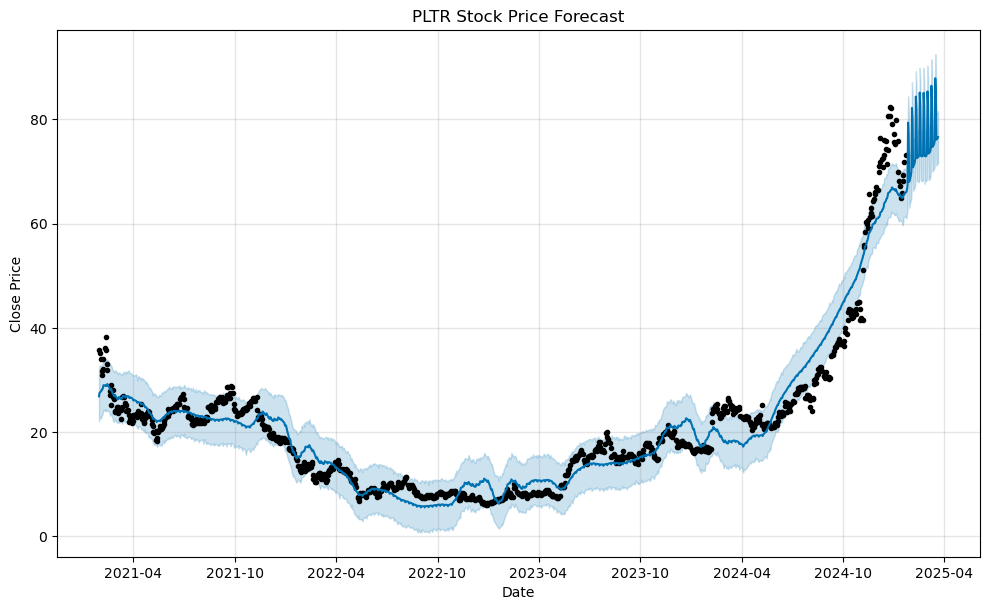

18:33:20 - cmdstanpy - INFO - Chain [1] start processing
18:33:20 - cmdstanpy - INFO - Chain [1] done processing


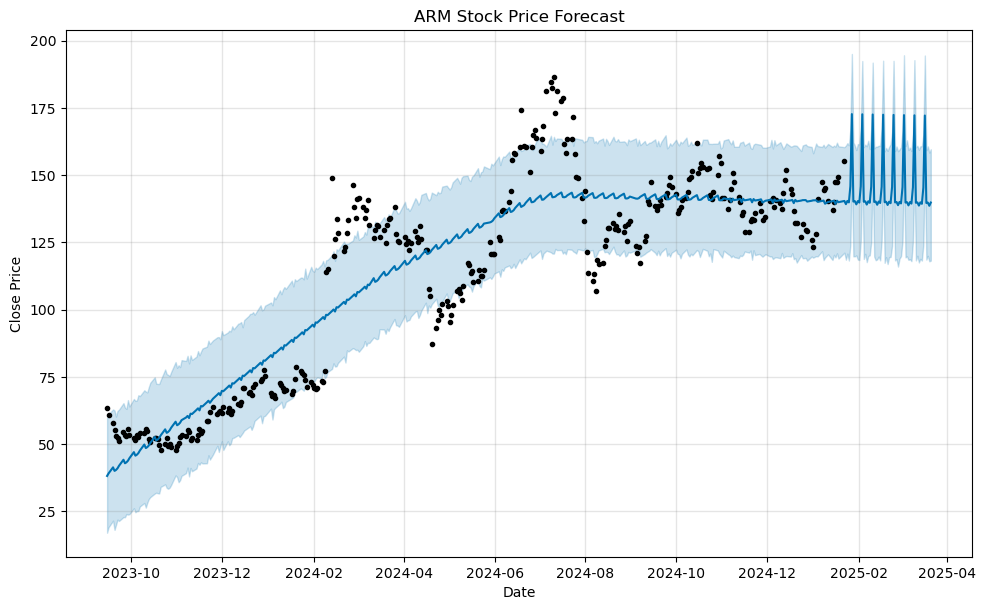

18:33:20 - cmdstanpy - INFO - Chain [1] start processing
18:33:20 - cmdstanpy - INFO - Chain [1] done processing


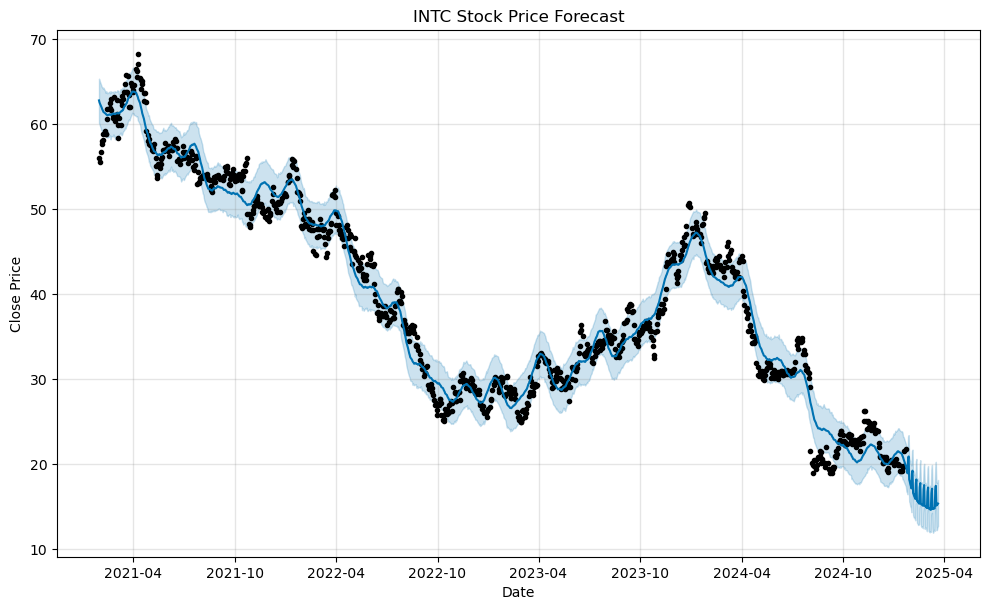

In [19]:
"""
This script installs the Prophet library, imports it, and uses it to forecast stock prices for a list of AI-related stocks.
Steps:
1. Install the Prophet library.
2. Import the Prophet class from the prophet module.
3. Iterate over a list of AI-related stock symbols.
4. For each stock symbol:
    a. Prepare the data by resetting the index and selecting the 'TimeStamp' and 'Close' columns.
    b. Remove timezone information from the 'TimeStamp' column.
    c. Rename the columns to 'ds' and 'y' as required by Prophet.
    d. Initialize a Prophet model.
    e. Fit the model to the prepared data.
    f. Create a future dataframe for the next 365 days.
    g. Use the model to make predictions for the future dataframe.
    h. Plot the forecasted stock prices with appropriate labels and title.
    i. Display the plot.
"""

%pip install prophet

from prophet import Prophet

for symbol in ai_stocks_list:

    # Prepare the data
    data = ai_stocks_df_dict_clean[symbol].reset_index()[['TimeStamp', 'Close']]
    data['TimeStamp'] = data['TimeStamp'].dt.tz_localize(None)
    data.columns = ['ds', 'y']

    # Initialize the model
    model = Prophet()

    # Fit the model
    model.fit(data)

    # Make a prediction
    future = model.make_future_dataframe(periods=58)
    forecast = model.predict(future)

    # Plot the forecast
    model.plot(forecast, xlabel='Date', ylabel='Close Price')
    plt.title(f'{symbol} Stock Price Forecast')
    plt.show()


18:34:20 - cmdstanpy - INFO - Chain [1] start processing
18:34:20 - cmdstanpy - INFO - Chain [1] done processing


Note: you may need to restart the kernel to use updated packages.


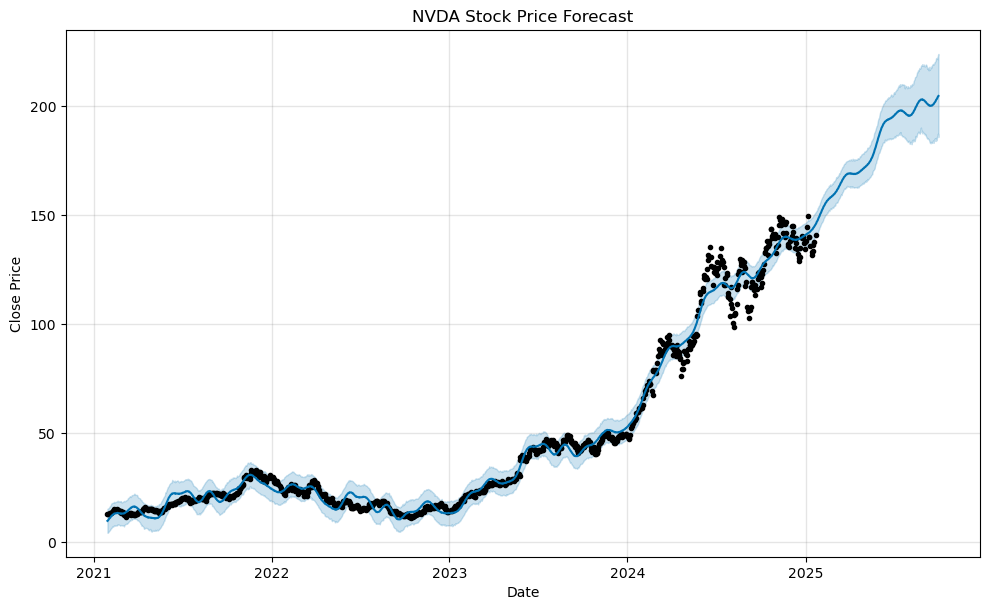

18:34:21 - cmdstanpy - INFO - Chain [1] start processing
18:34:21 - cmdstanpy - INFO - Chain [1] done processing


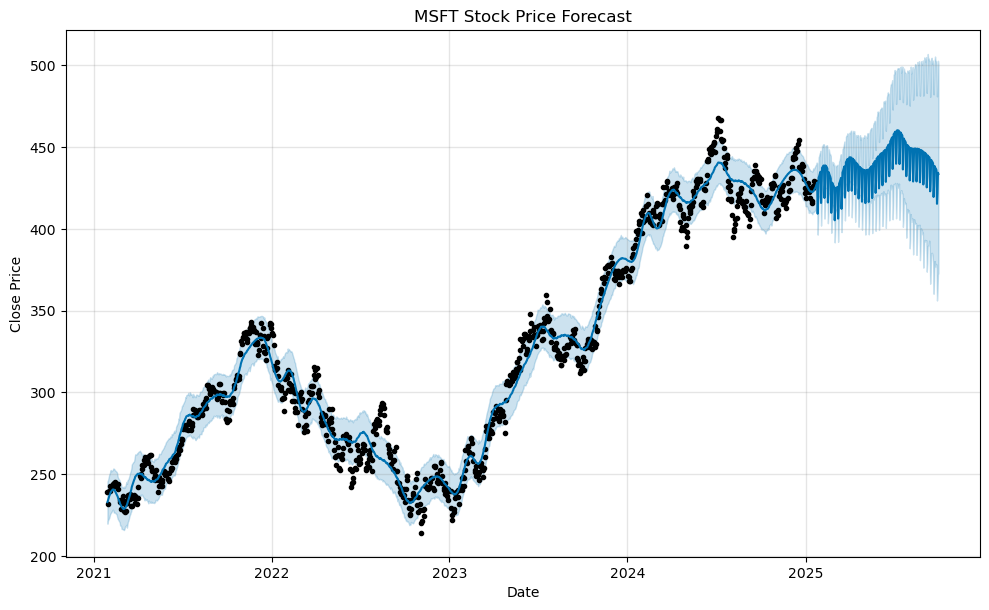

18:34:21 - cmdstanpy - INFO - Chain [1] start processing
18:34:21 - cmdstanpy - INFO - Chain [1] done processing


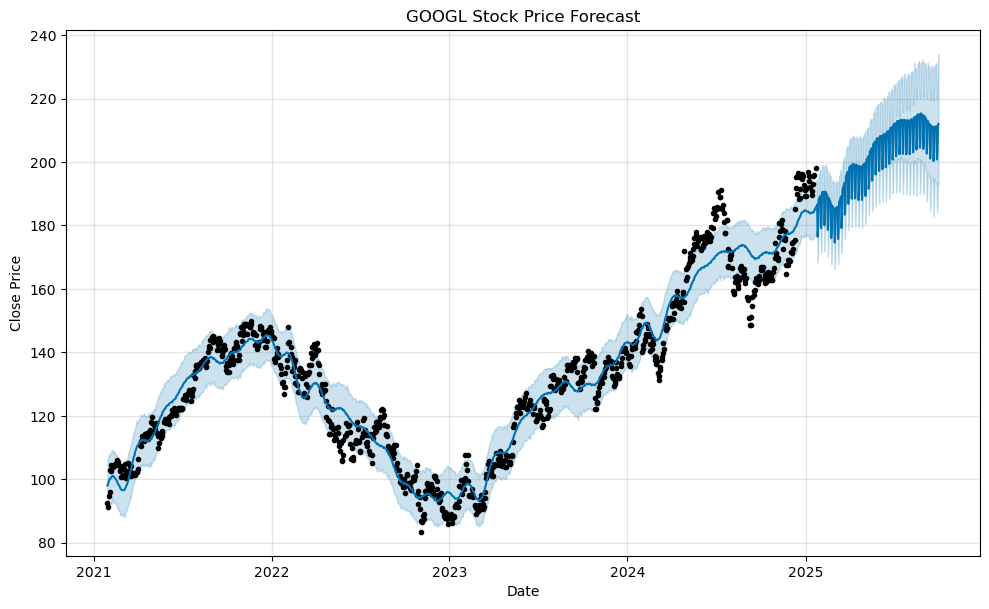

18:34:22 - cmdstanpy - INFO - Chain [1] start processing
18:34:22 - cmdstanpy - INFO - Chain [1] done processing


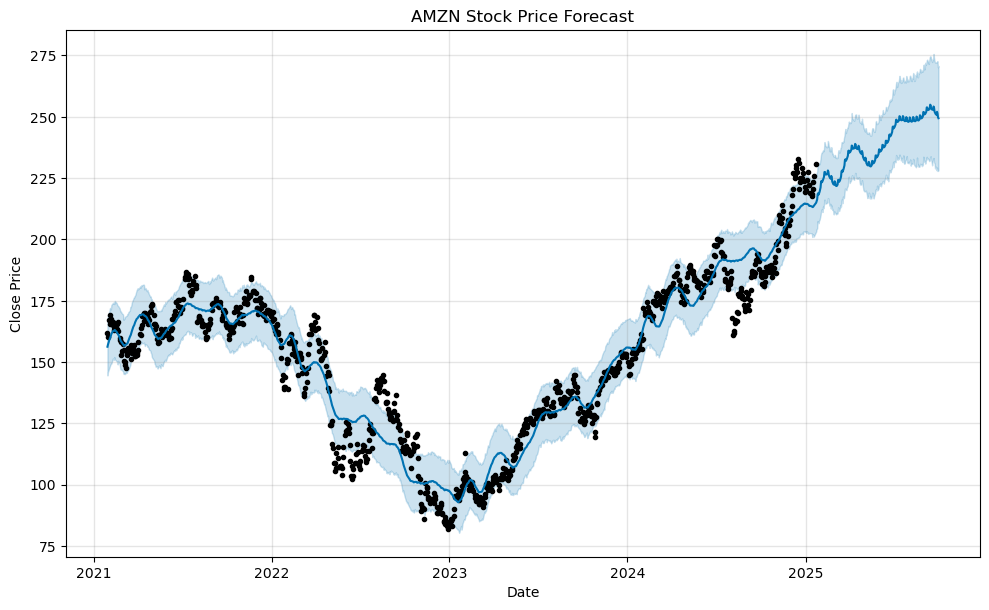

18:34:22 - cmdstanpy - INFO - Chain [1] start processing
18:34:22 - cmdstanpy - INFO - Chain [1] done processing


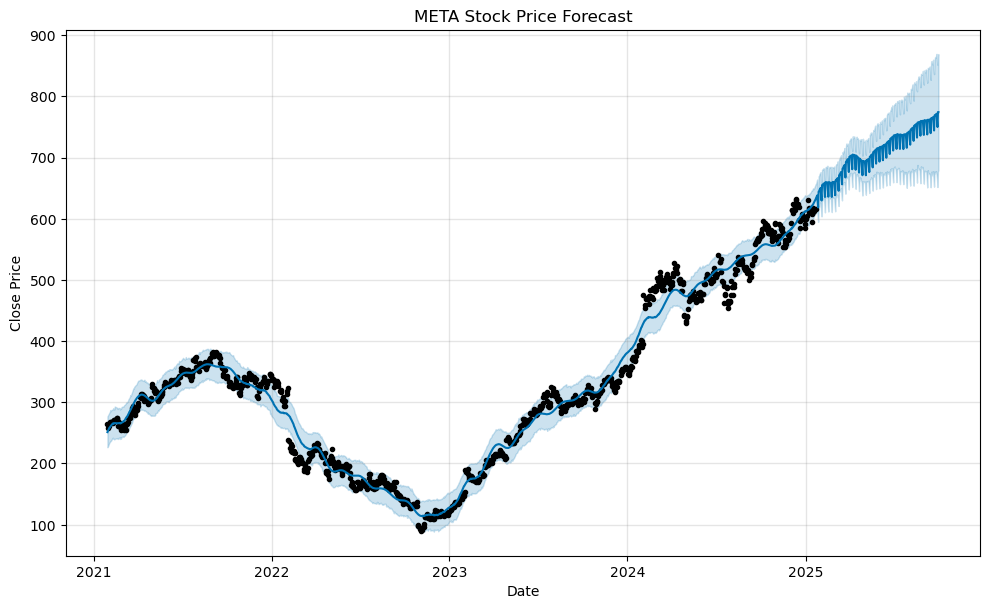

18:34:23 - cmdstanpy - INFO - Chain [1] start processing
18:34:23 - cmdstanpy - INFO - Chain [1] done processing


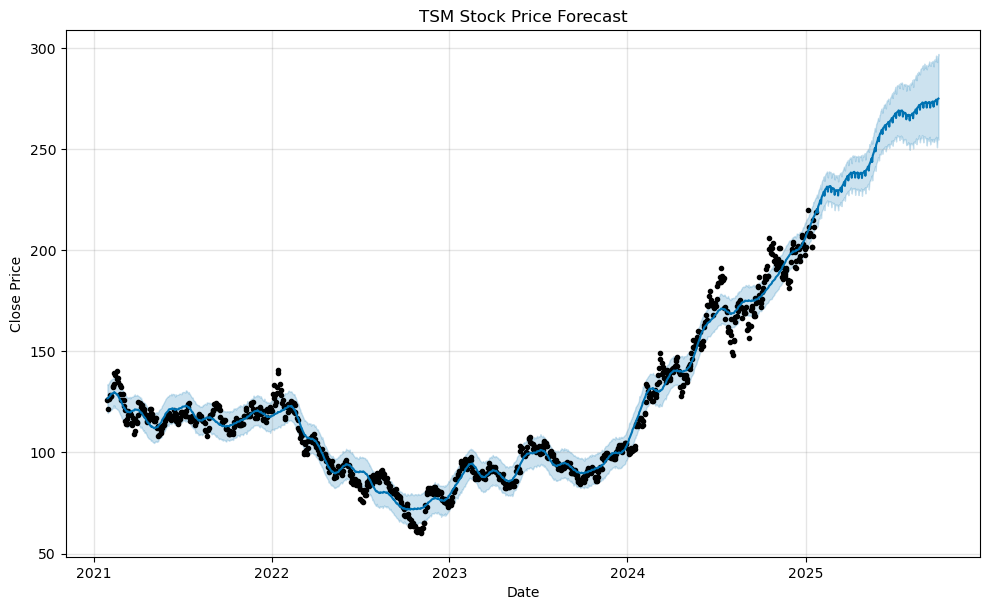

18:34:23 - cmdstanpy - INFO - Chain [1] start processing
18:34:23 - cmdstanpy - INFO - Chain [1] done processing


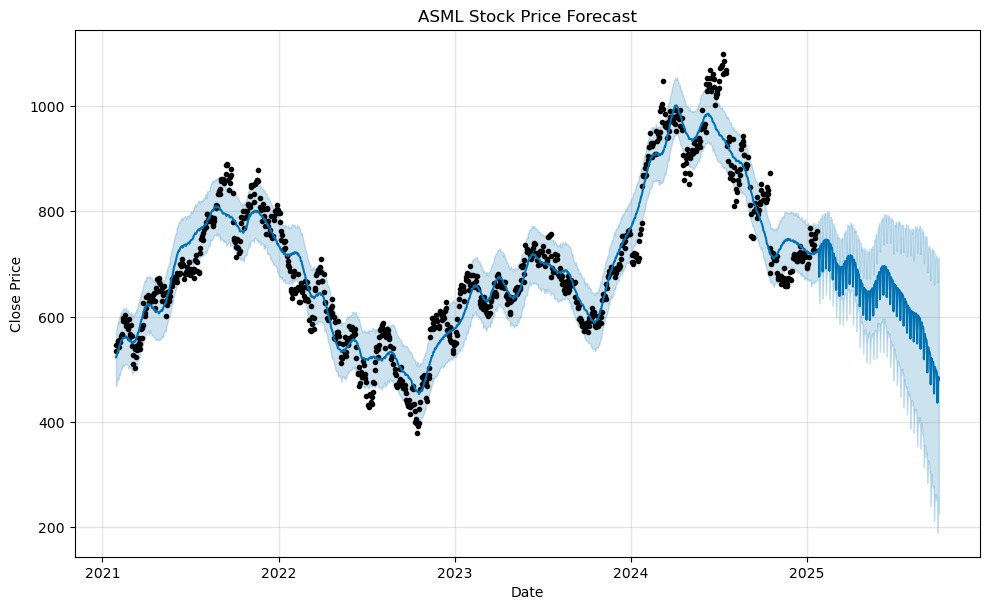

18:34:23 - cmdstanpy - INFO - Chain [1] start processing
18:34:24 - cmdstanpy - INFO - Chain [1] done processing


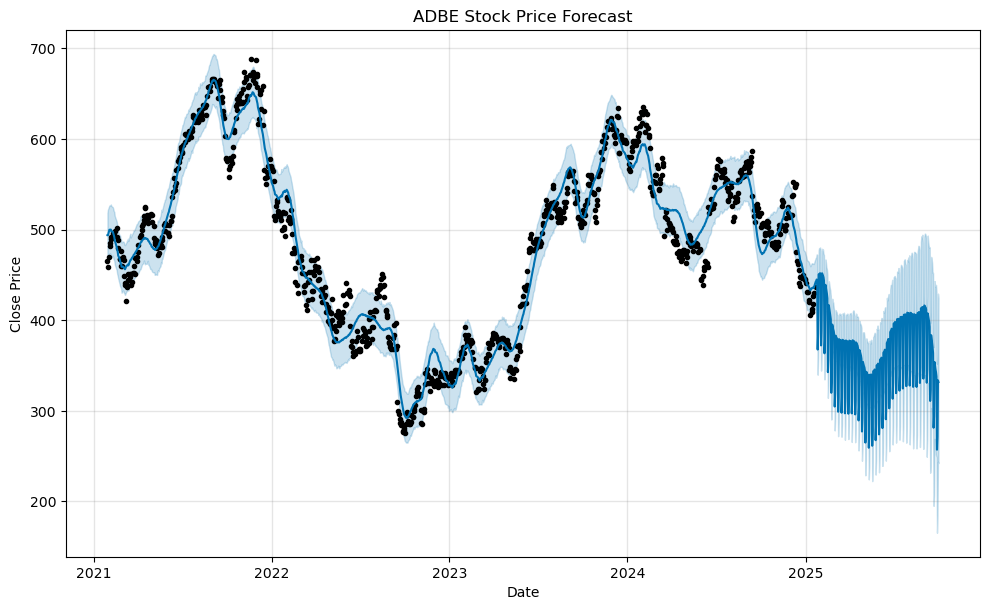

18:34:24 - cmdstanpy - INFO - Chain [1] start processing
18:34:24 - cmdstanpy - INFO - Chain [1] done processing


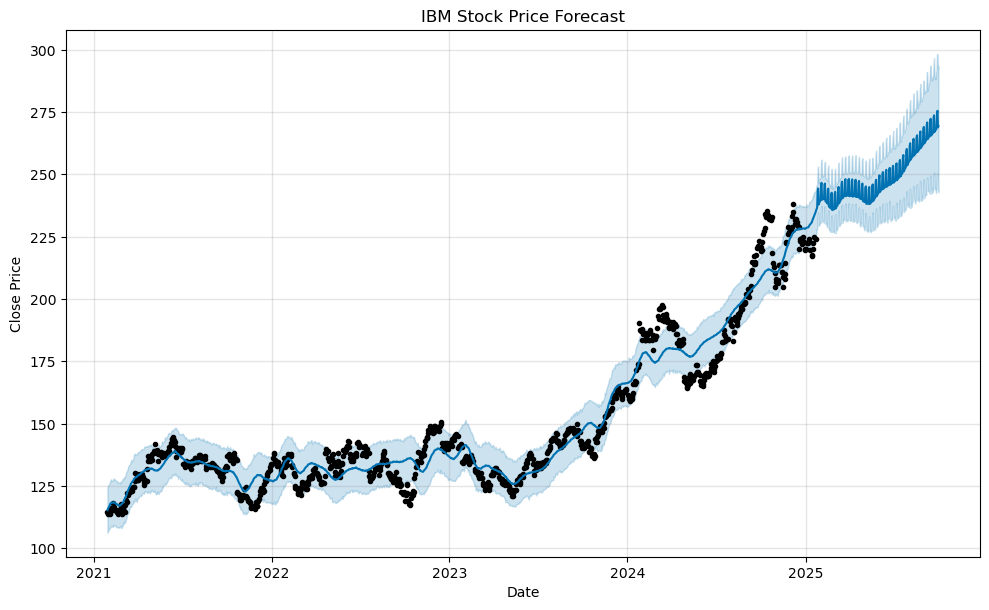

18:34:24 - cmdstanpy - INFO - Chain [1] start processing
18:34:24 - cmdstanpy - INFO - Chain [1] done processing


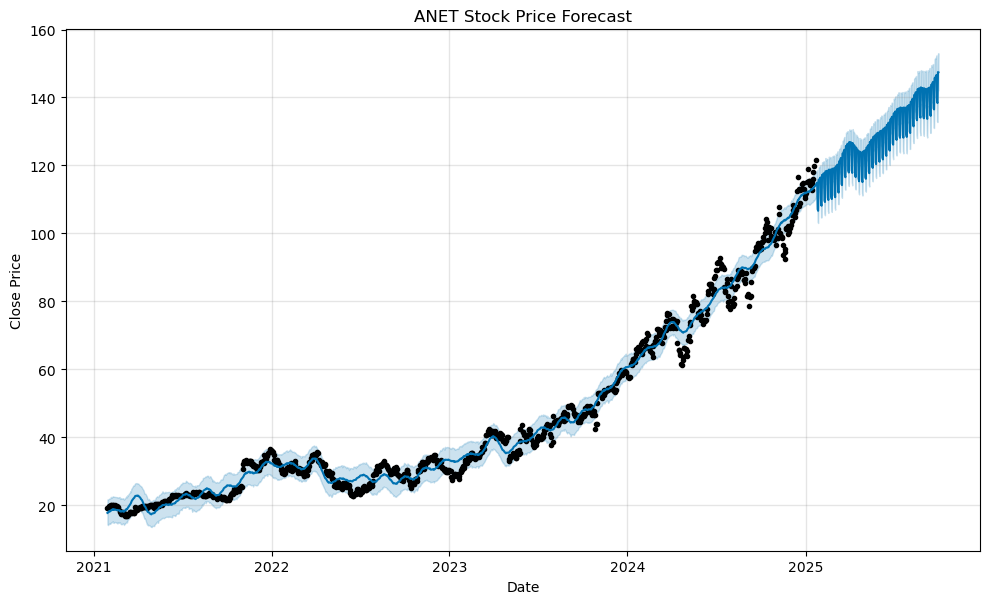

18:34:25 - cmdstanpy - INFO - Chain [1] start processing
18:34:25 - cmdstanpy - INFO - Chain [1] done processing


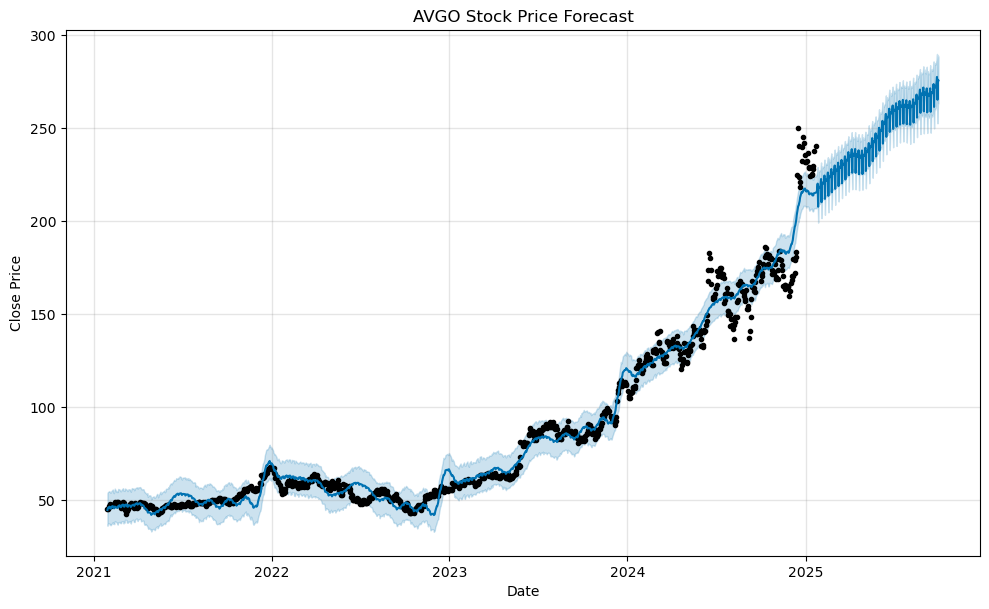

18:34:25 - cmdstanpy - INFO - Chain [1] start processing
18:34:25 - cmdstanpy - INFO - Chain [1] done processing


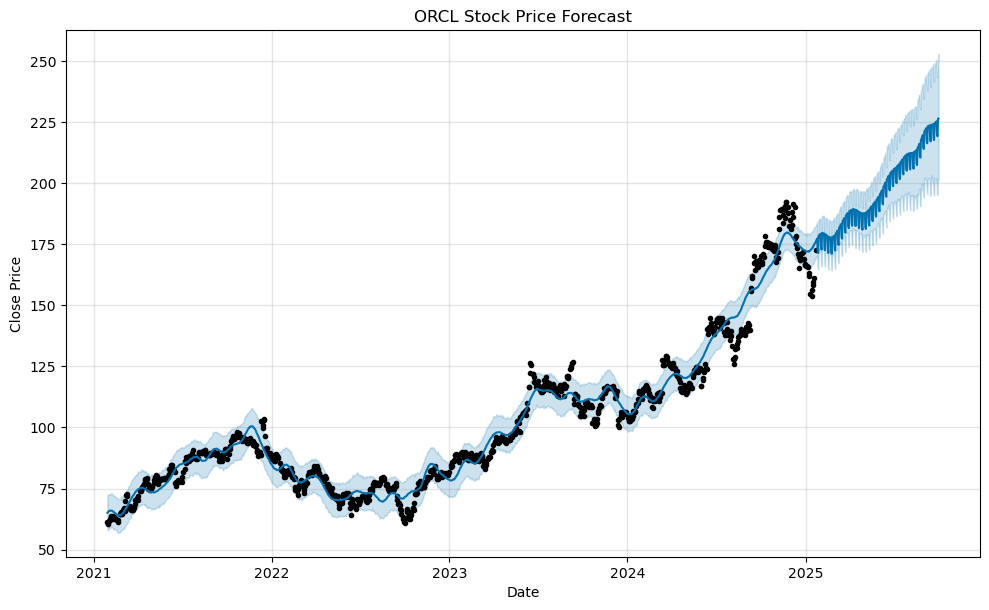

18:34:26 - cmdstanpy - INFO - Chain [1] start processing
18:34:26 - cmdstanpy - INFO - Chain [1] done processing


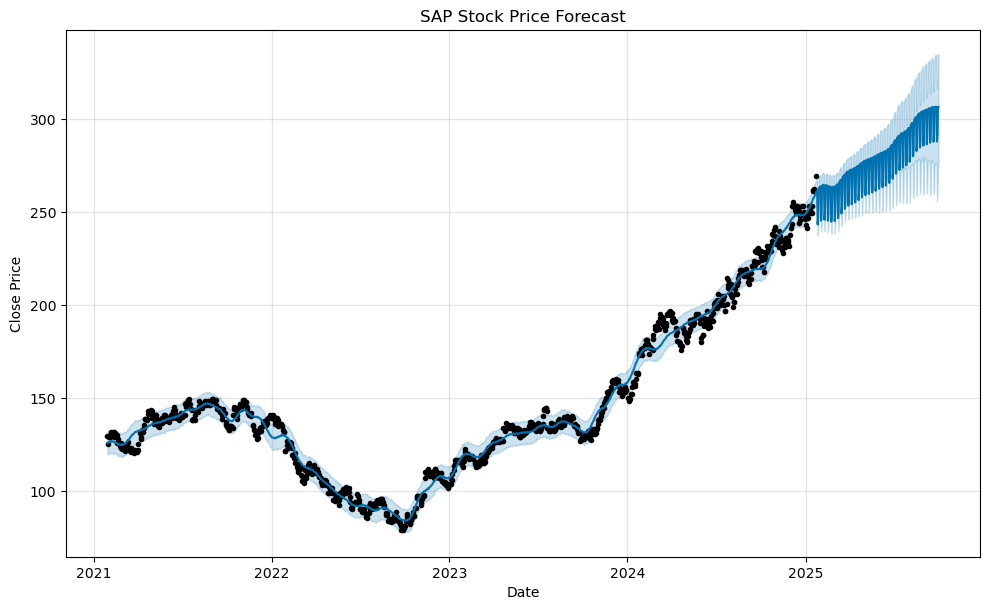

18:34:26 - cmdstanpy - INFO - Chain [1] start processing
18:34:26 - cmdstanpy - INFO - Chain [1] done processing


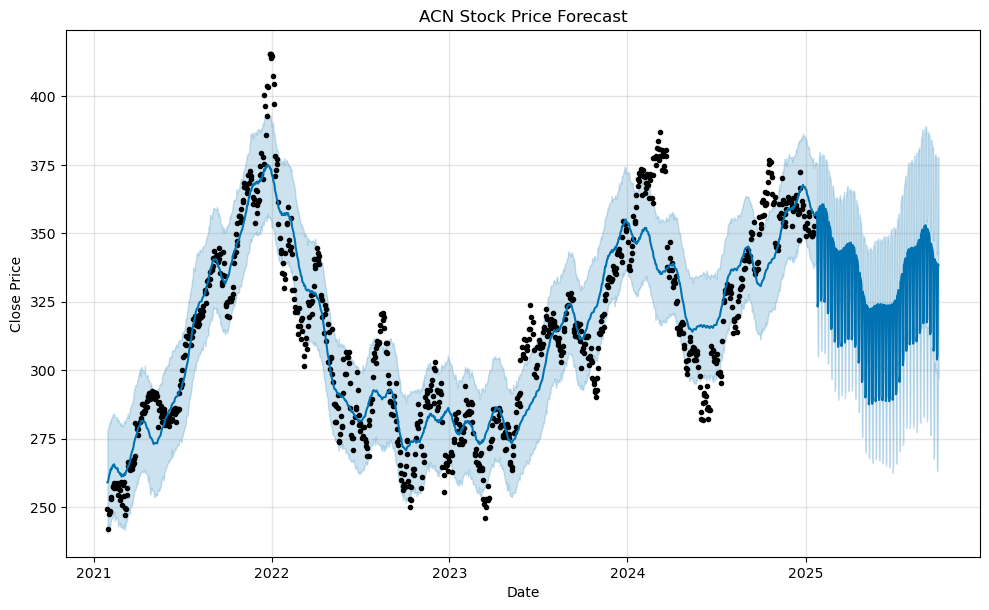

18:34:26 - cmdstanpy - INFO - Chain [1] start processing
18:34:27 - cmdstanpy - INFO - Chain [1] done processing


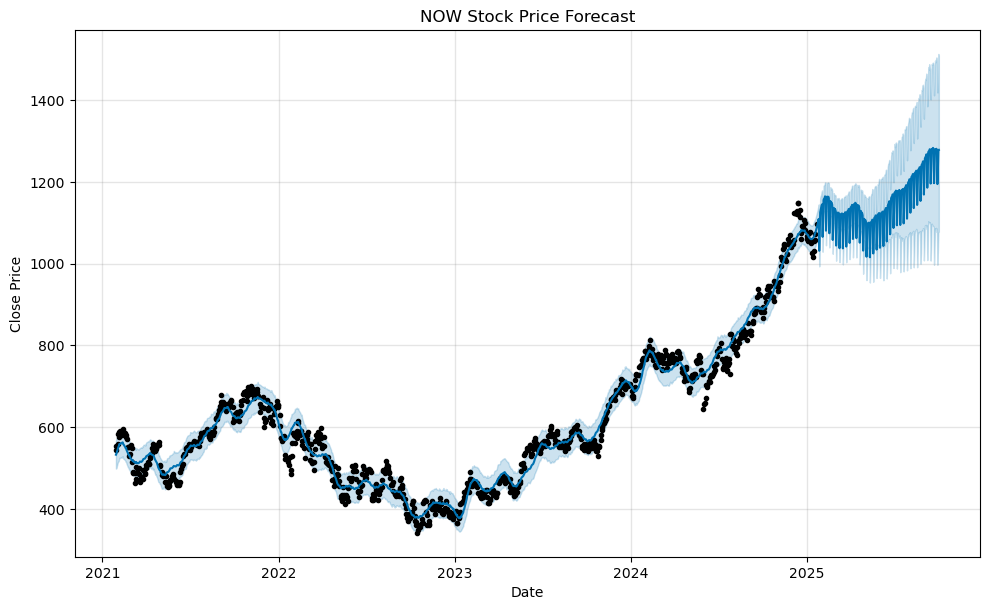

18:34:27 - cmdstanpy - INFO - Chain [1] start processing
18:34:27 - cmdstanpy - INFO - Chain [1] done processing


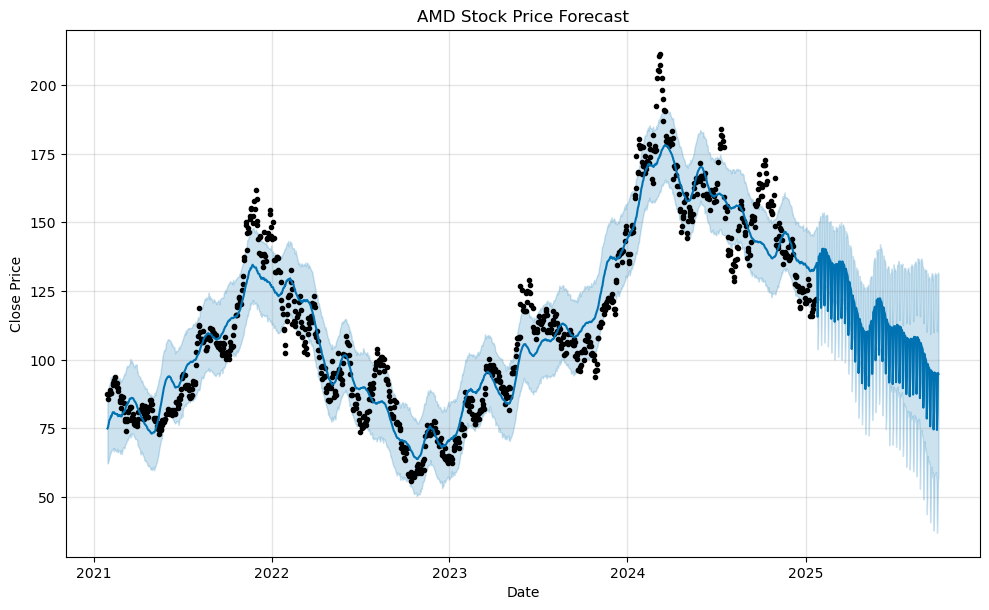

18:34:27 - cmdstanpy - INFO - Chain [1] start processing
18:34:27 - cmdstanpy - INFO - Chain [1] done processing


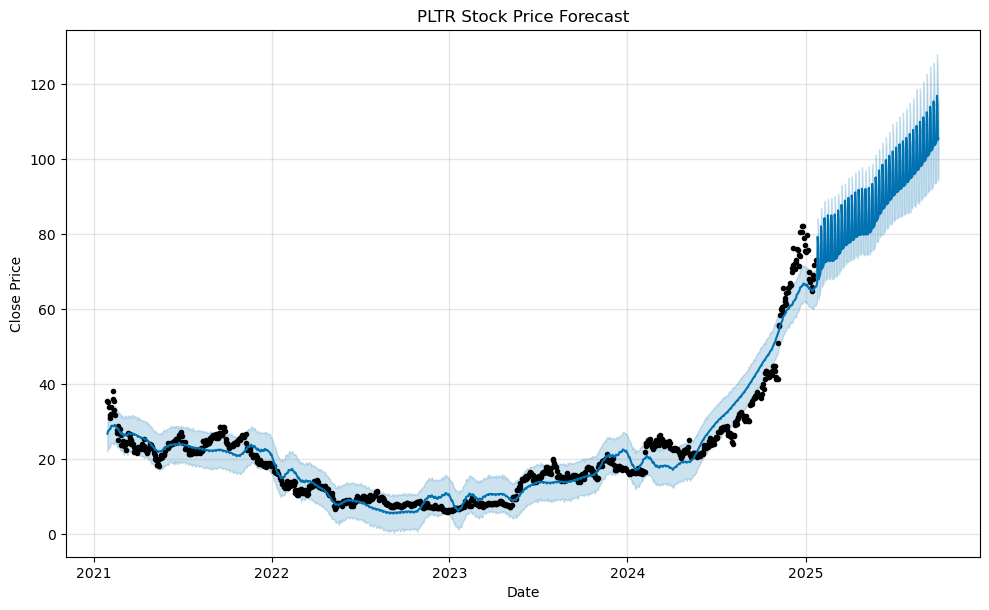

18:34:28 - cmdstanpy - INFO - Chain [1] start processing
18:34:28 - cmdstanpy - INFO - Chain [1] done processing


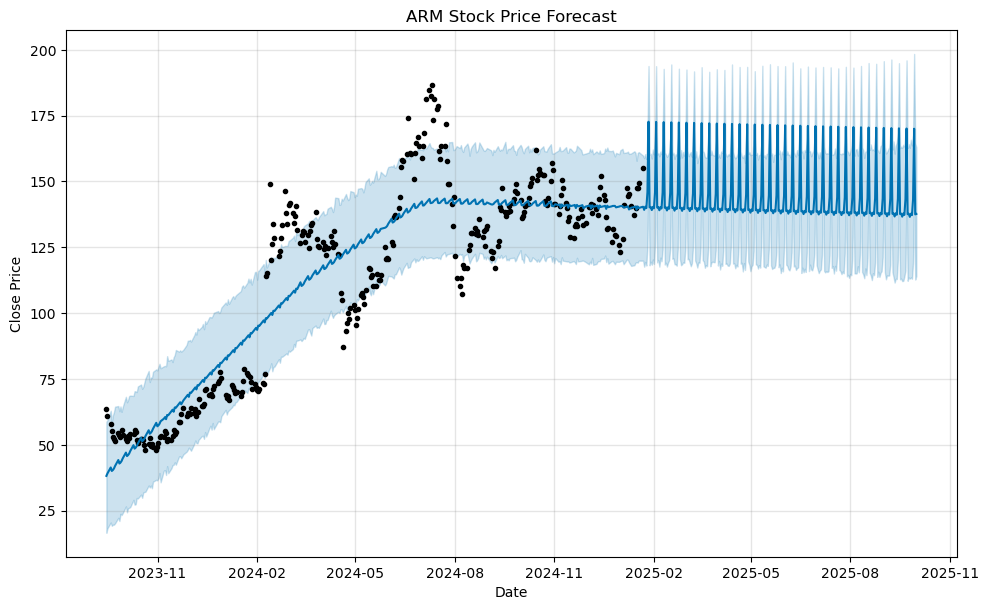

18:34:28 - cmdstanpy - INFO - Chain [1] start processing
18:34:28 - cmdstanpy - INFO - Chain [1] done processing


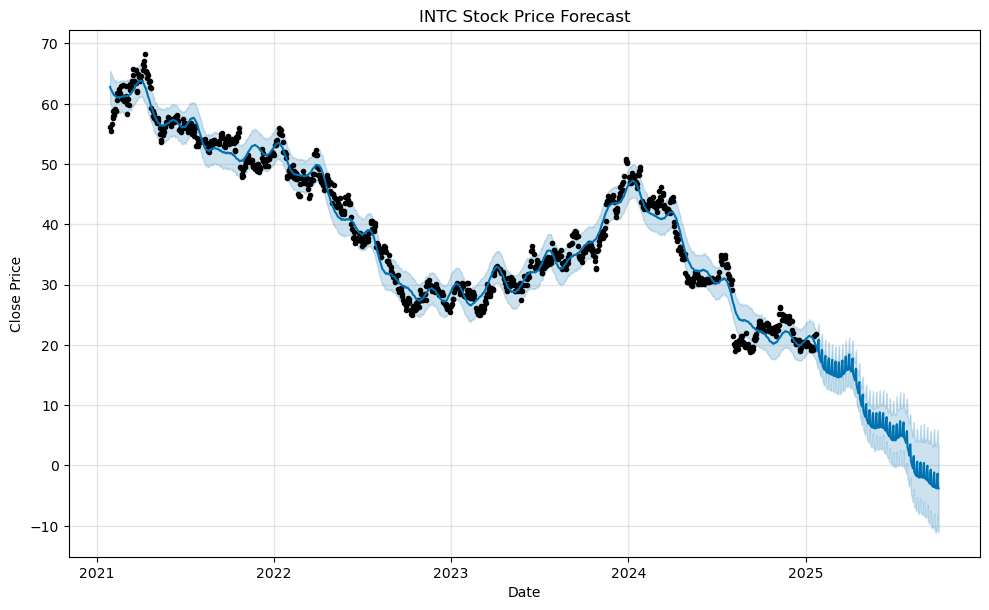

In [20]:
"""
This script installs the Prophet library, imports it, and uses it to forecast stock prices for a list of AI-related stocks.
Steps:
1. Install the Prophet library.
2. Import the Prophet class from the prophet module.
3. Iterate over a list of AI-related stock symbols.
4. For each stock symbol:
    a. Prepare the data by resetting the index and selecting the 'TimeStamp' and 'Close' columns.
    b. Remove timezone information from the 'TimeStamp' column.
    c. Rename the columns to 'ds' and 'y' as required by Prophet.
    d. Initialize a Prophet model.
    e. Fit the model to the prepared data.
    f. Create a future dataframe for the next 365 days.
    g. Use the model to make predictions for the future dataframe.
    h. Plot the forecasted stock prices with appropriate labels and title.
    i. Display the plot.
"""

%pip install prophet

from prophet import Prophet

for symbol in ai_stocks_list:

    # Prepare the data
    data = ai_stocks_df_dict_clean[symbol].reset_index()[['TimeStamp', 'Close']]
    data['TimeStamp'] = data['TimeStamp'].dt.tz_localize(None)
    data.columns = ['ds', 'y']

    # Initialize the model
    model = Prophet()

    # Fit the model
    model.fit(data)

    # Make a prediction
    future = model.make_future_dataframe(periods=252)
    forecast = model.predict(future)

    # Plot the forecast
    model.plot(forecast, xlabel='Date', ylabel='Close Price')
    plt.title(f'{symbol} Stock Price Forecast')
    plt.show()


### Analyse Technical Indicators 
    - Moving Averages (50 and 200 Day MA)
    - Volatility (ATR)
    - RSI

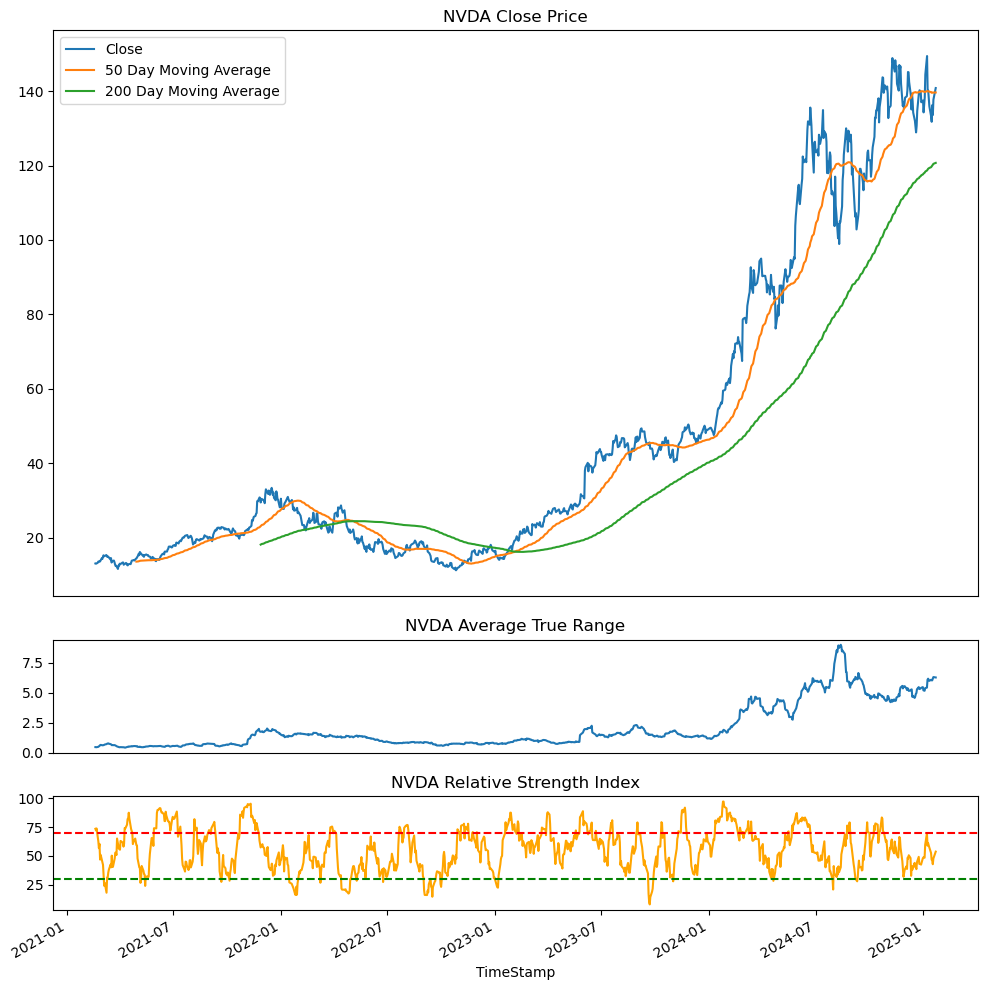

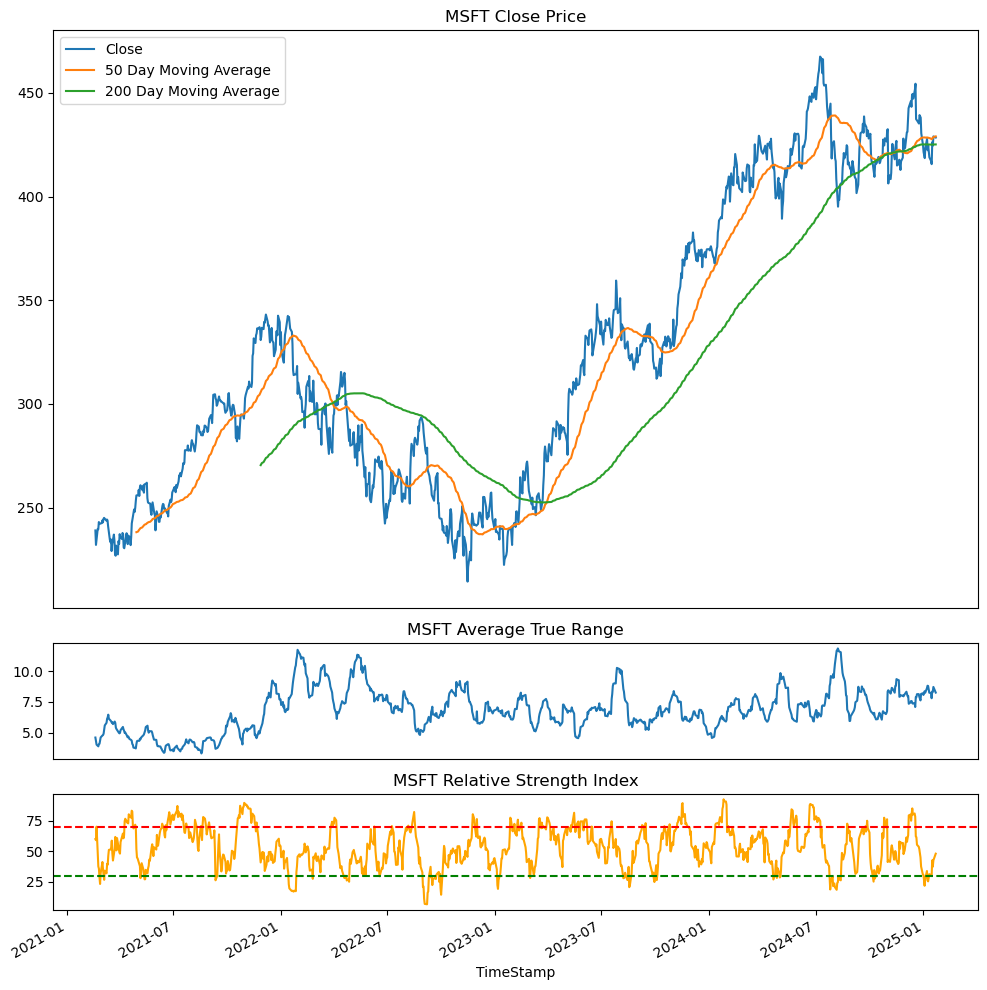

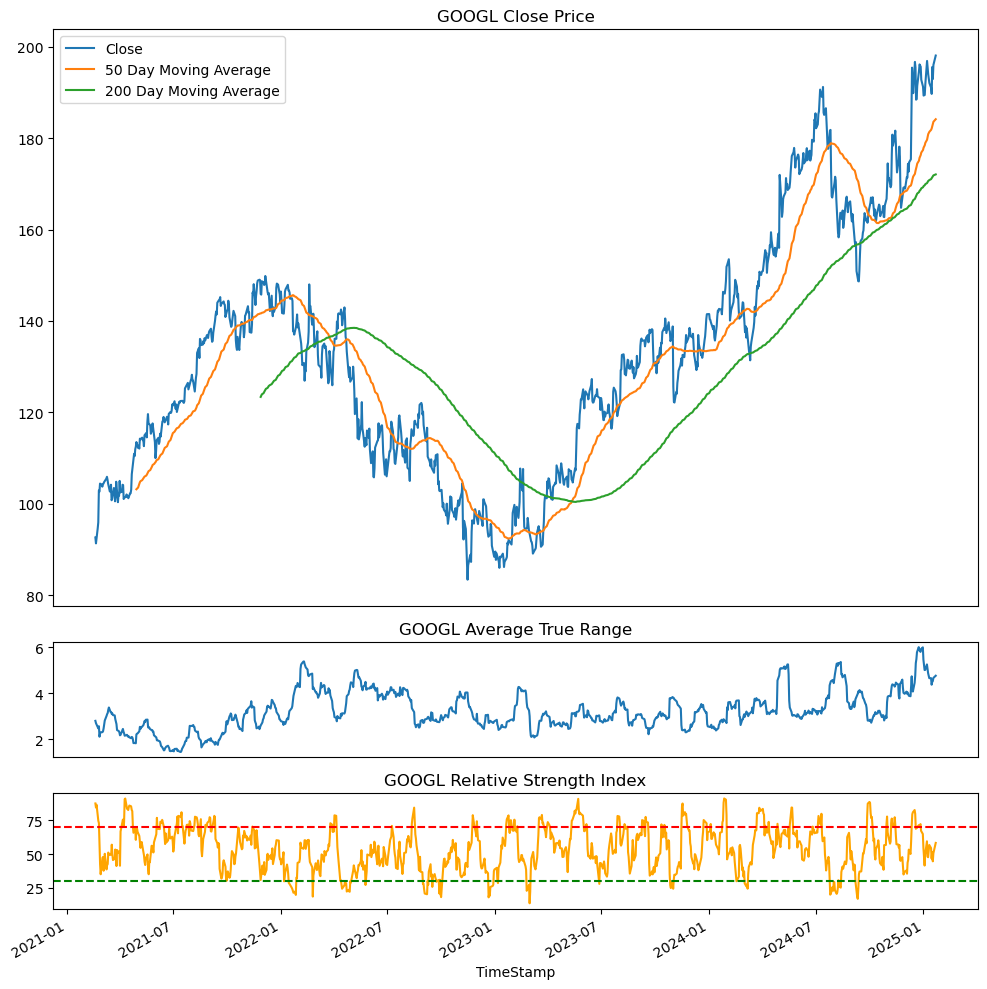

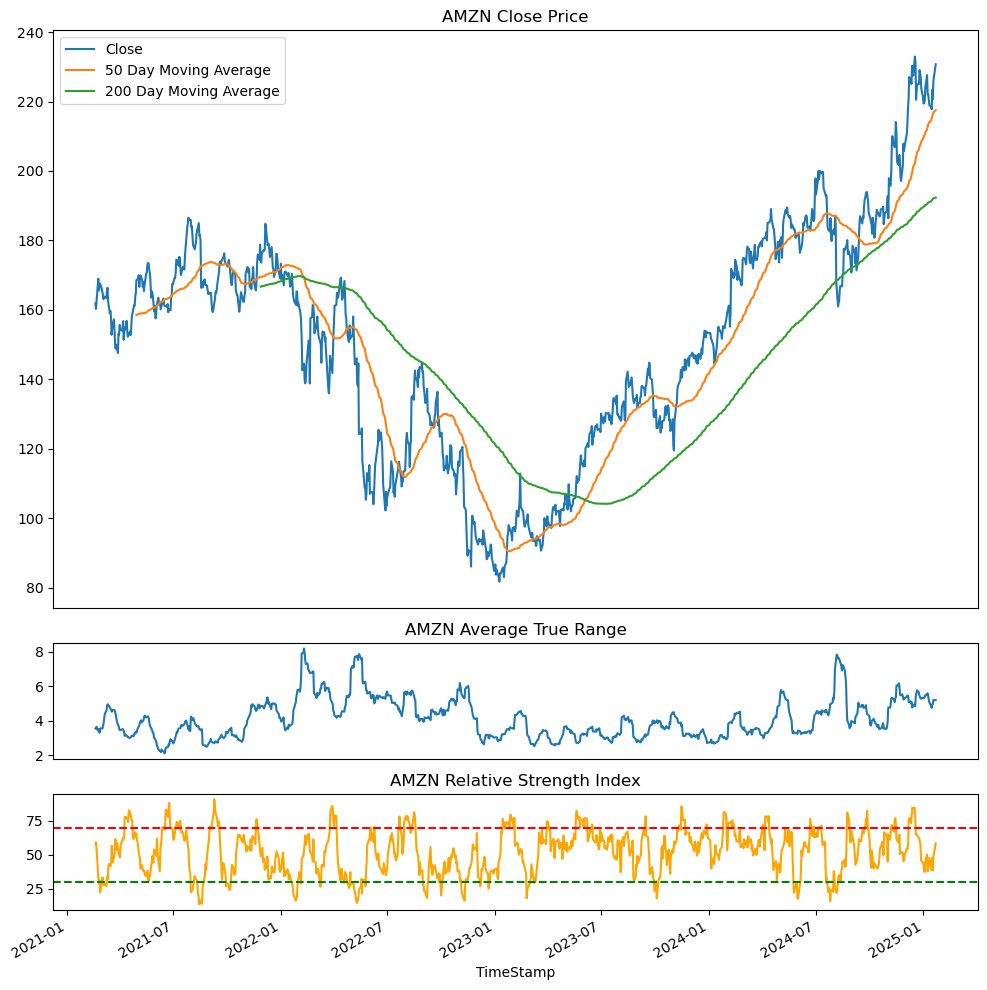

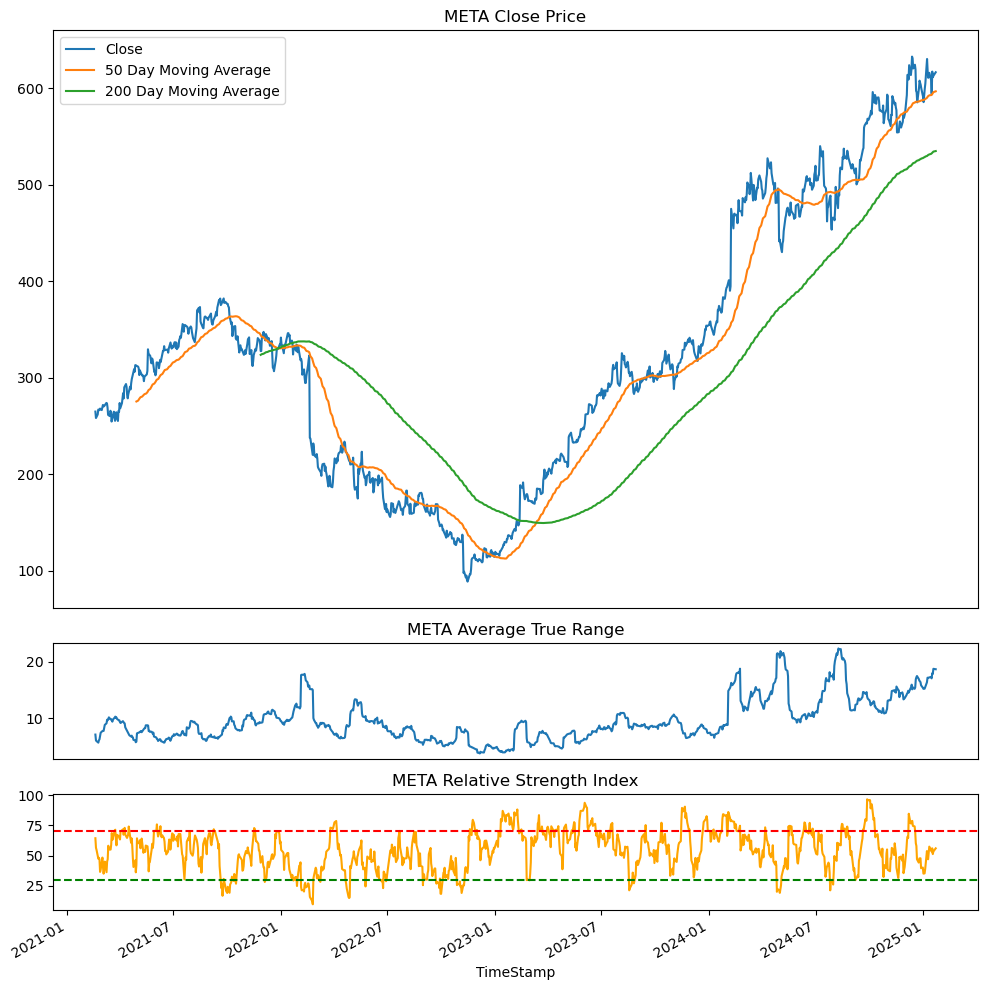

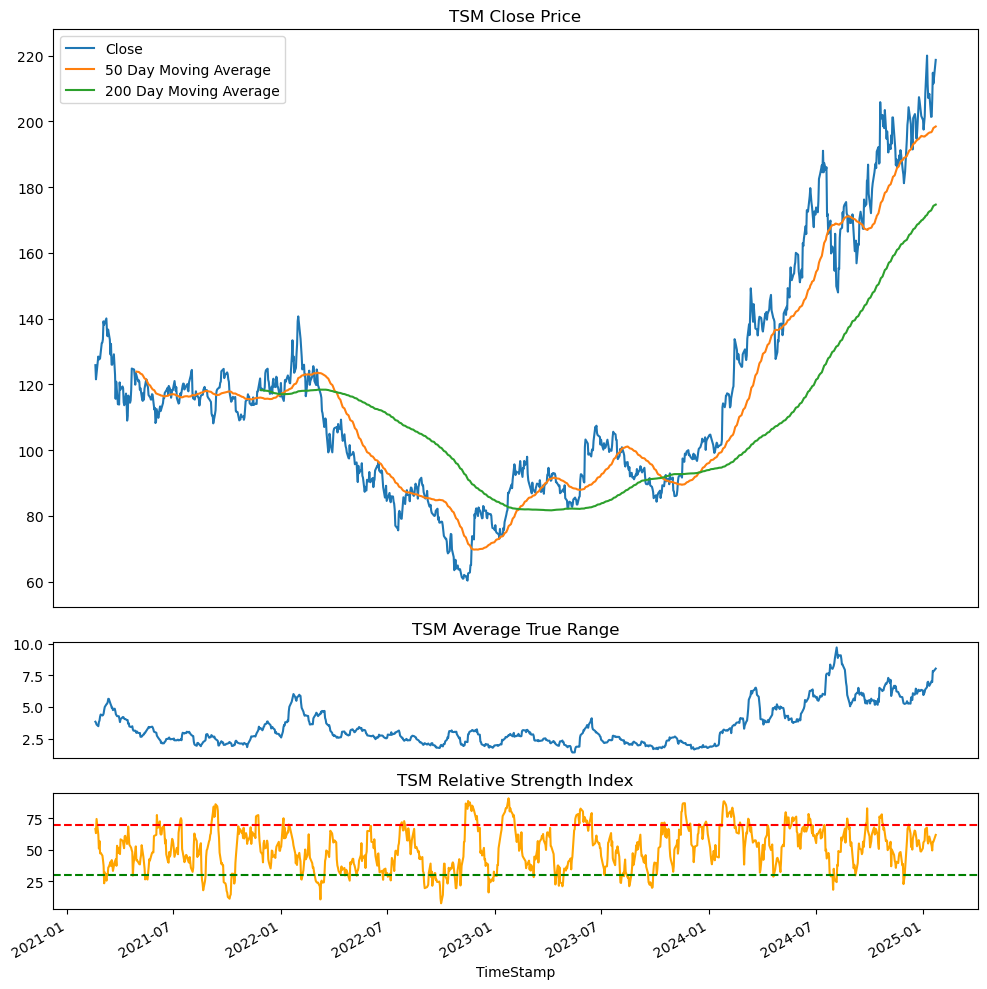

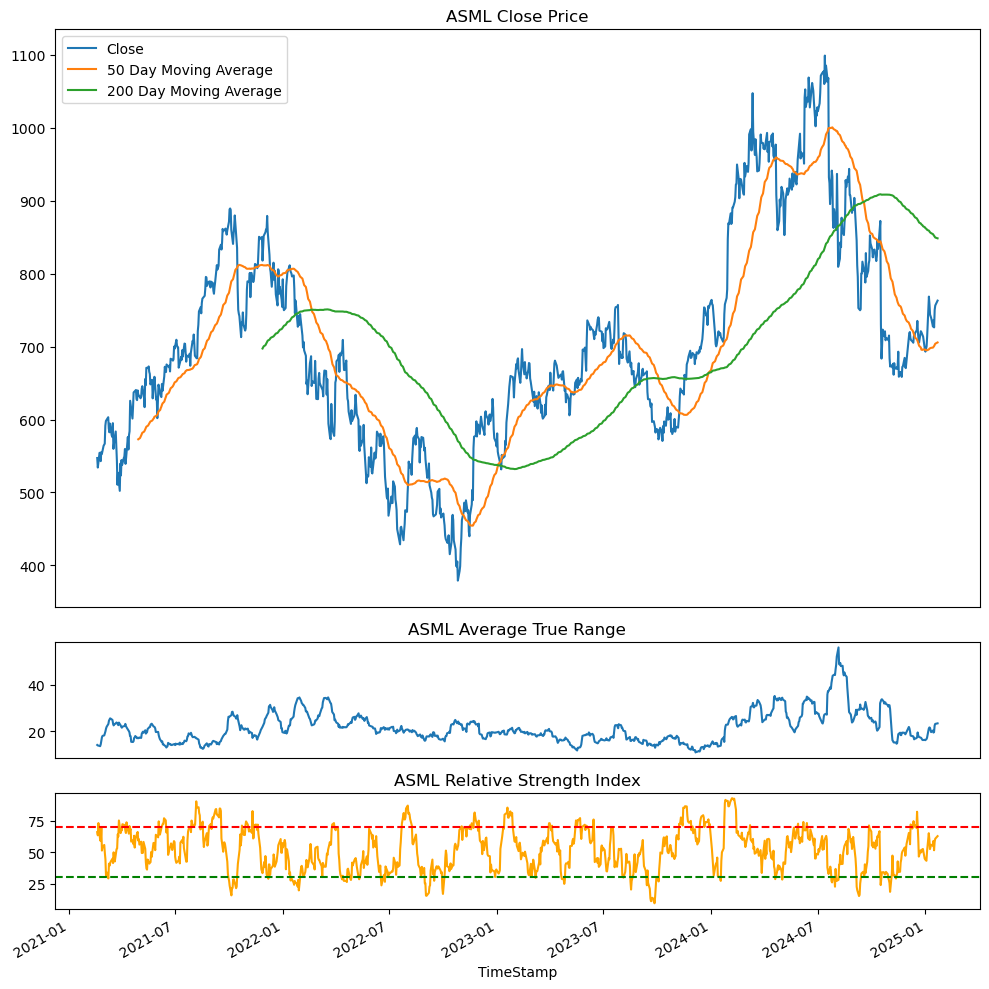

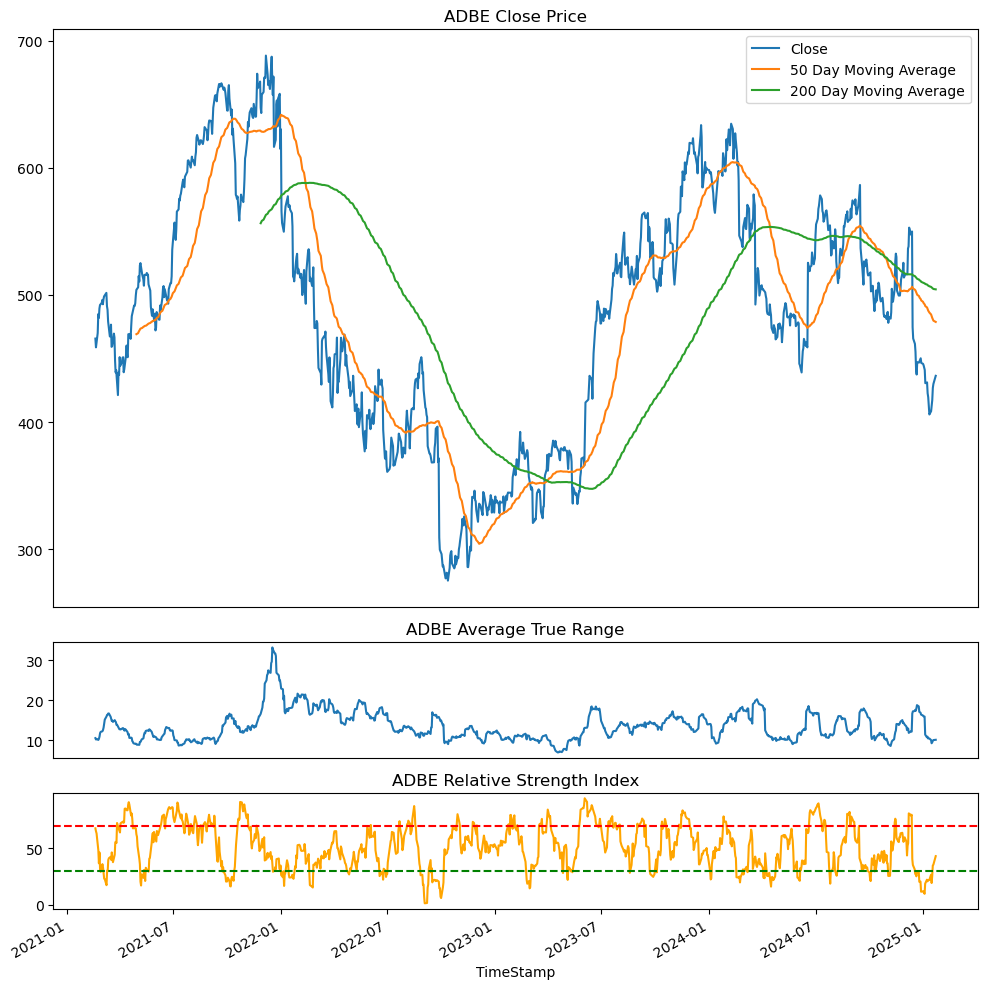

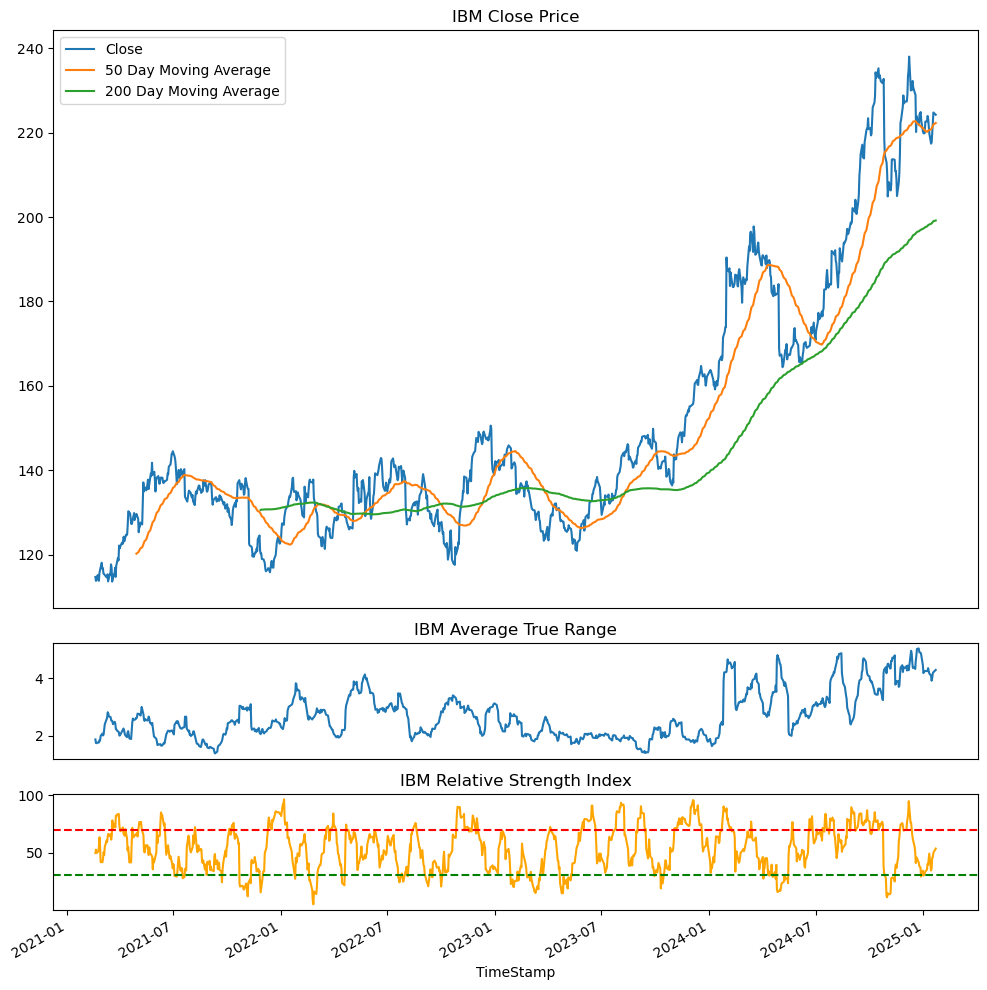

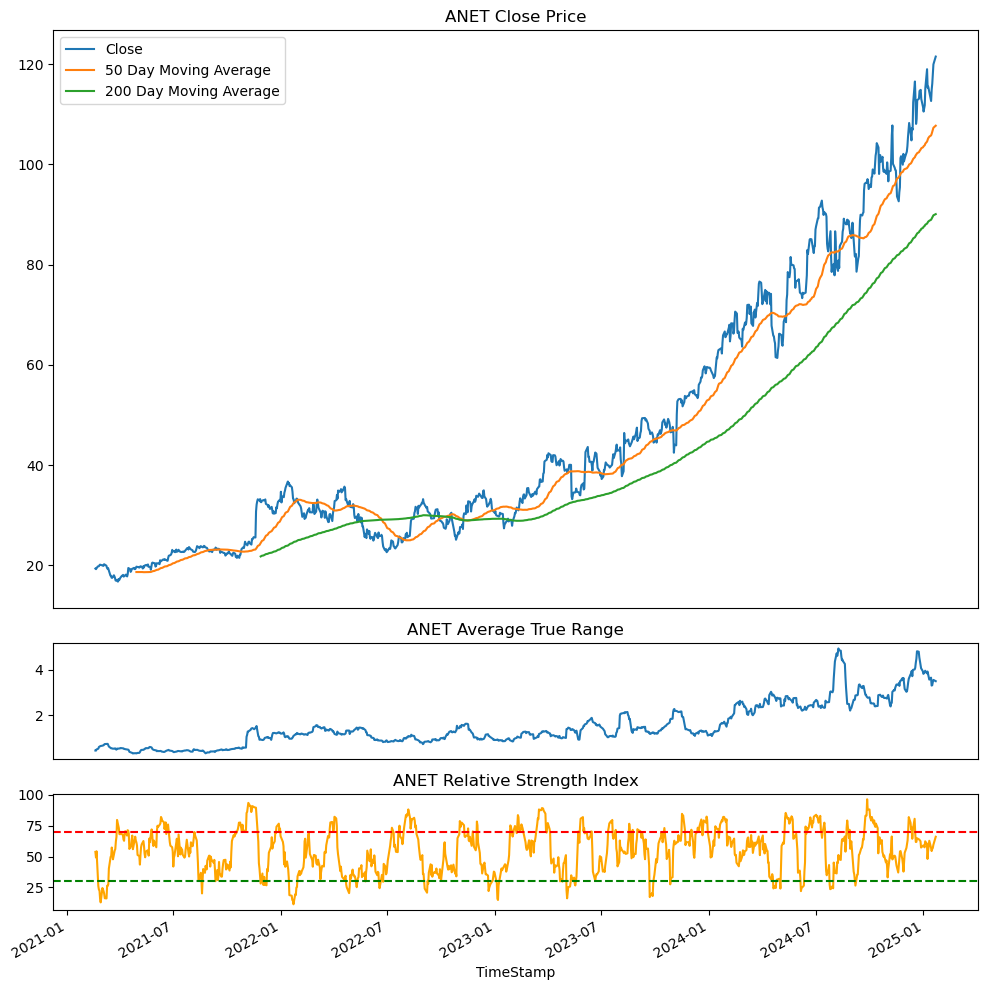

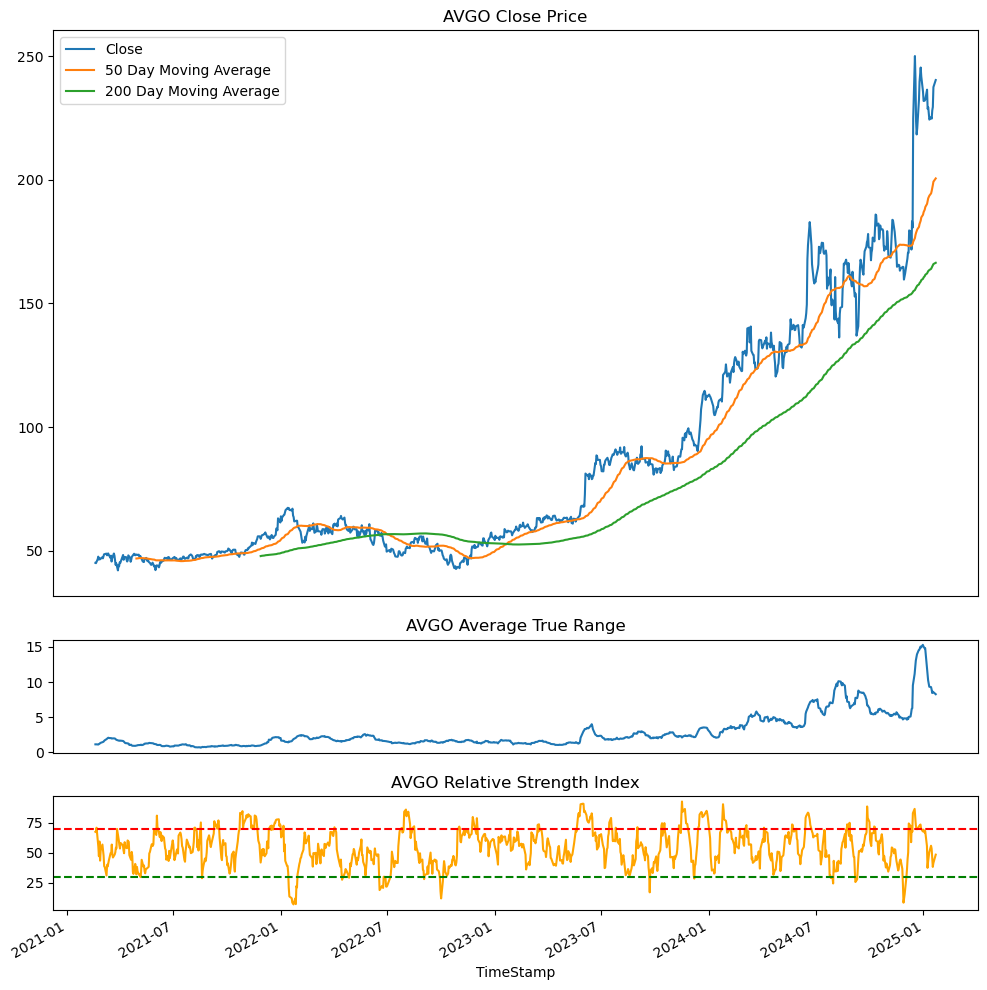

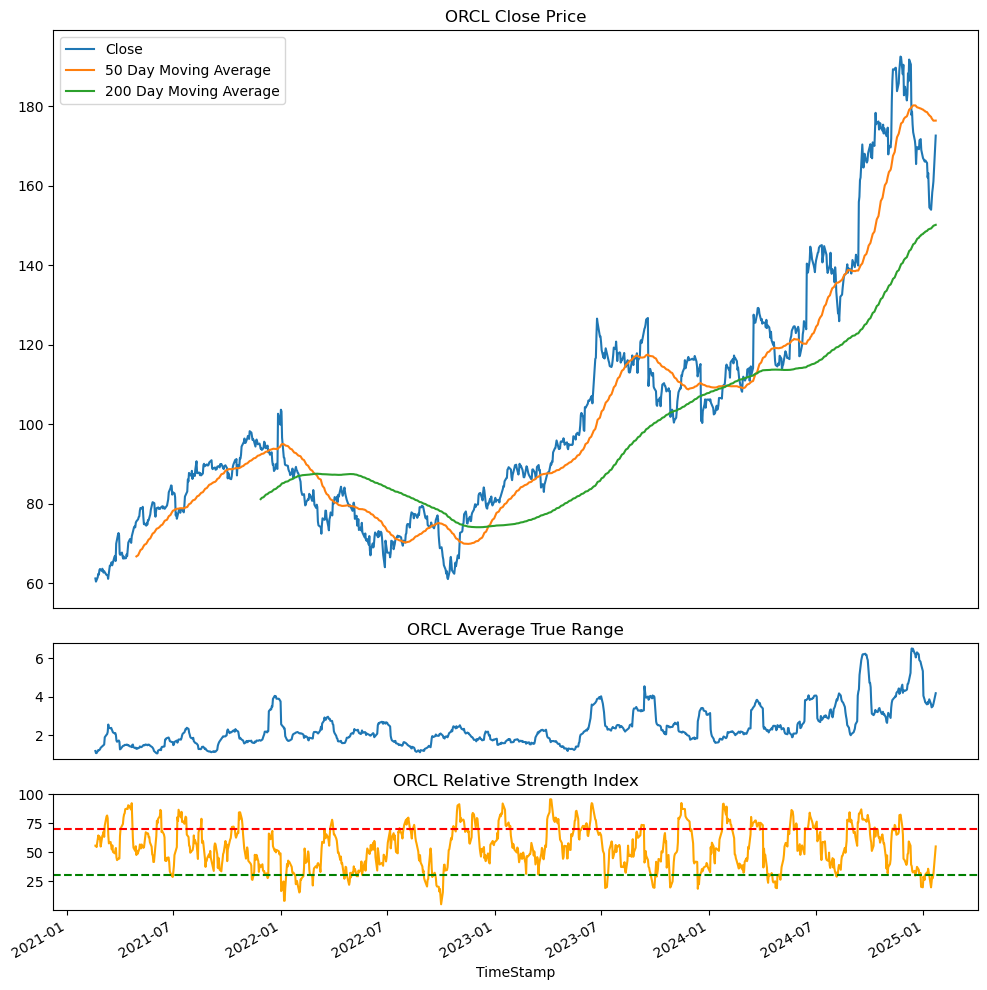

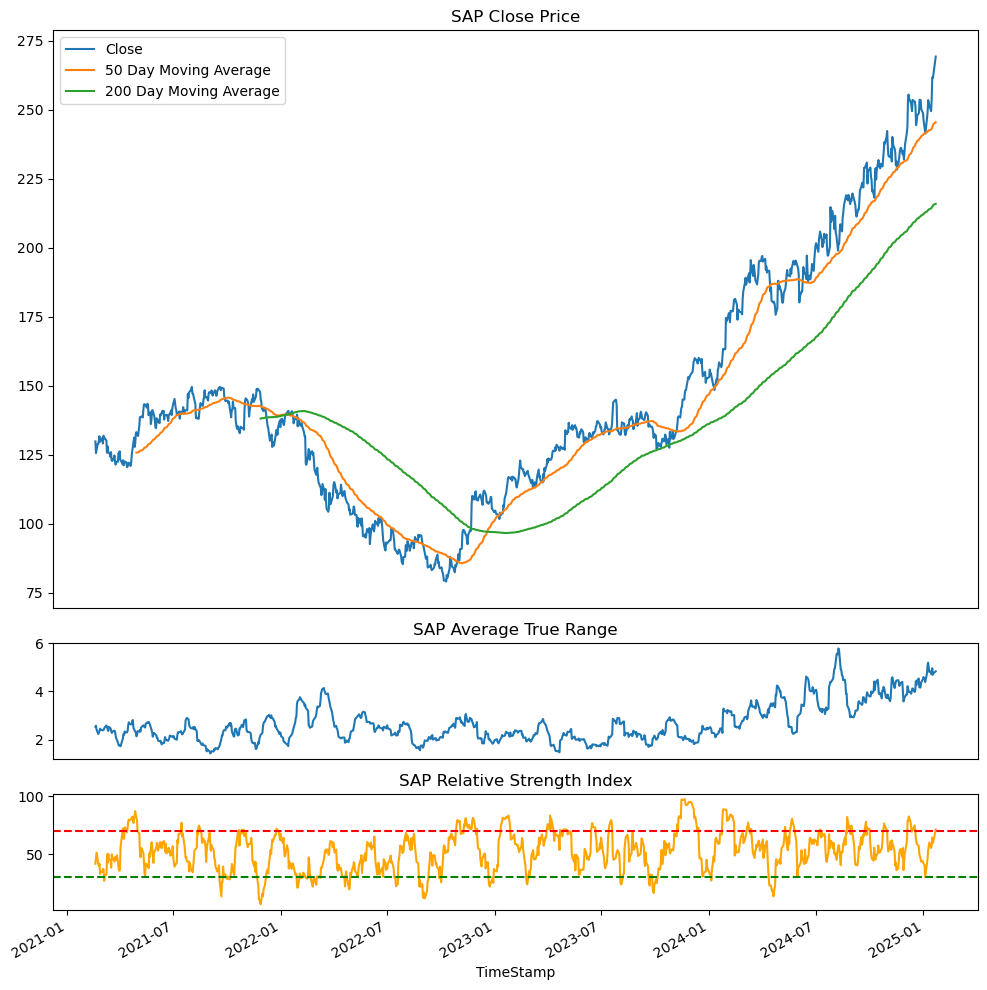

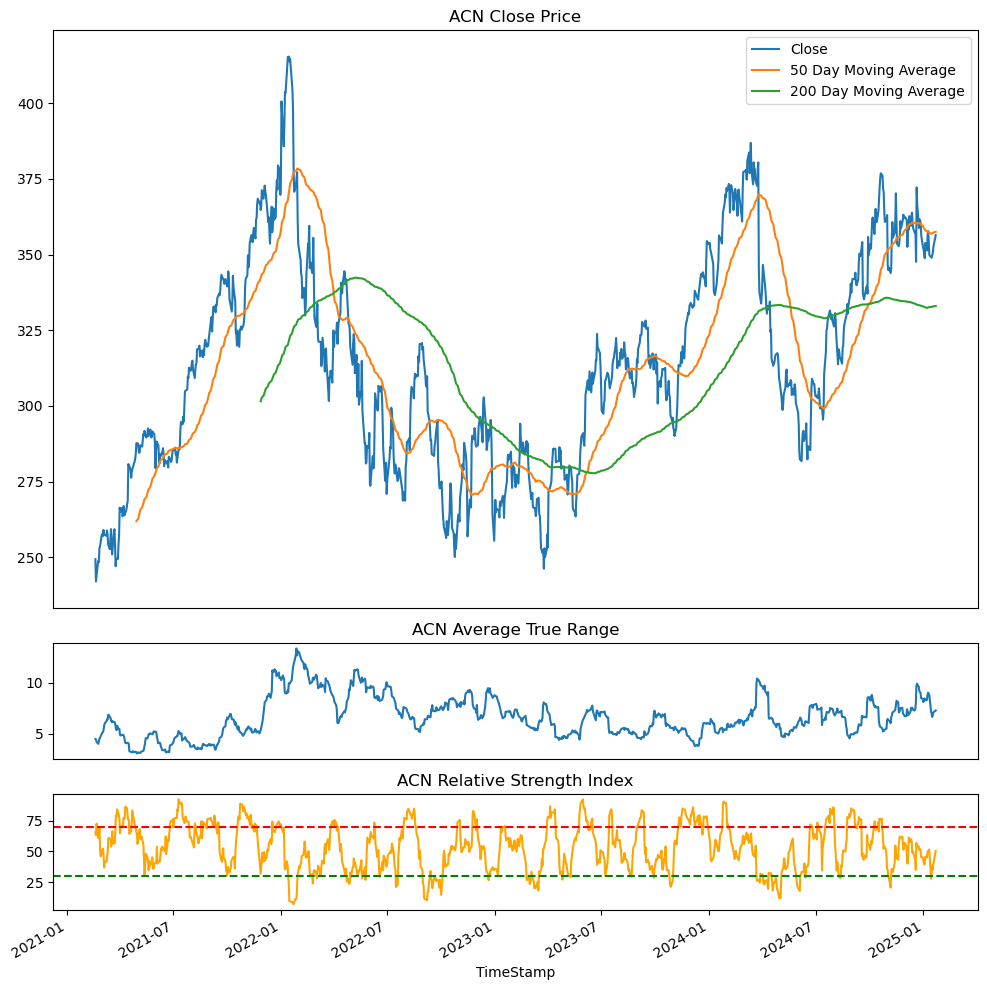

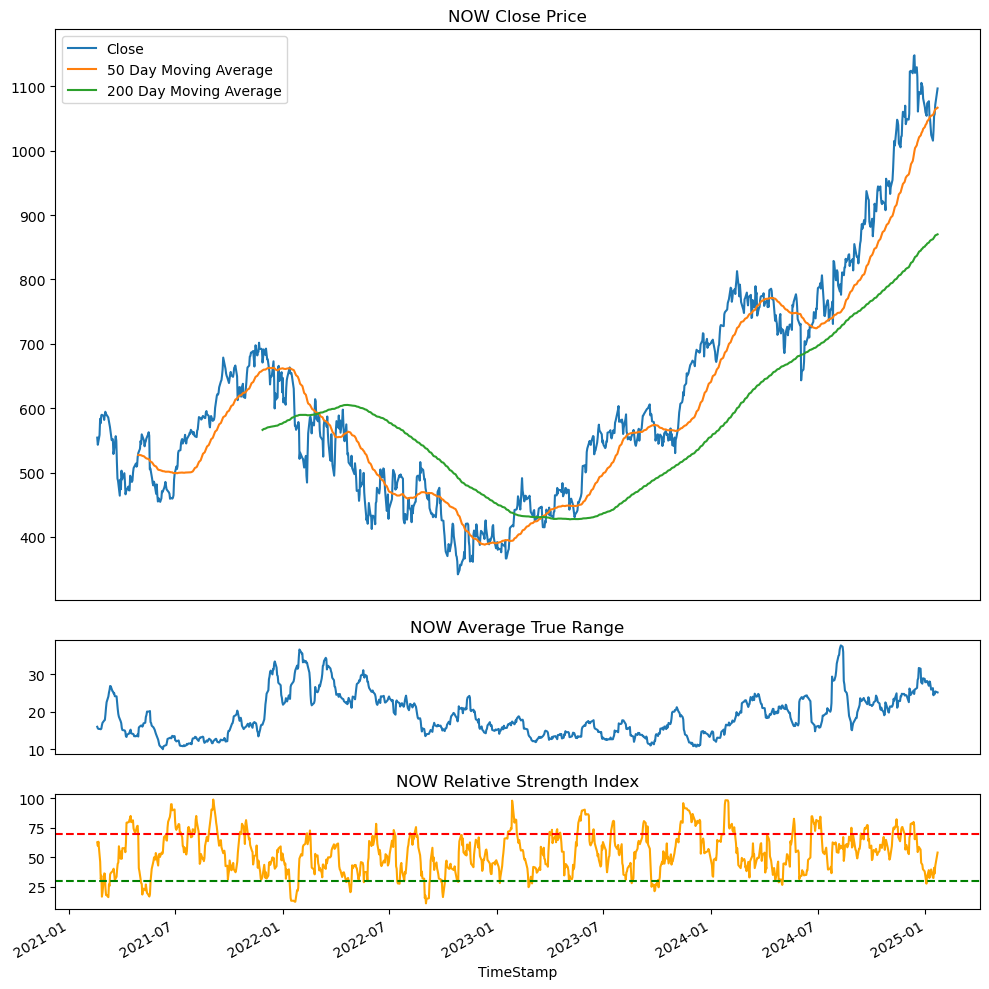

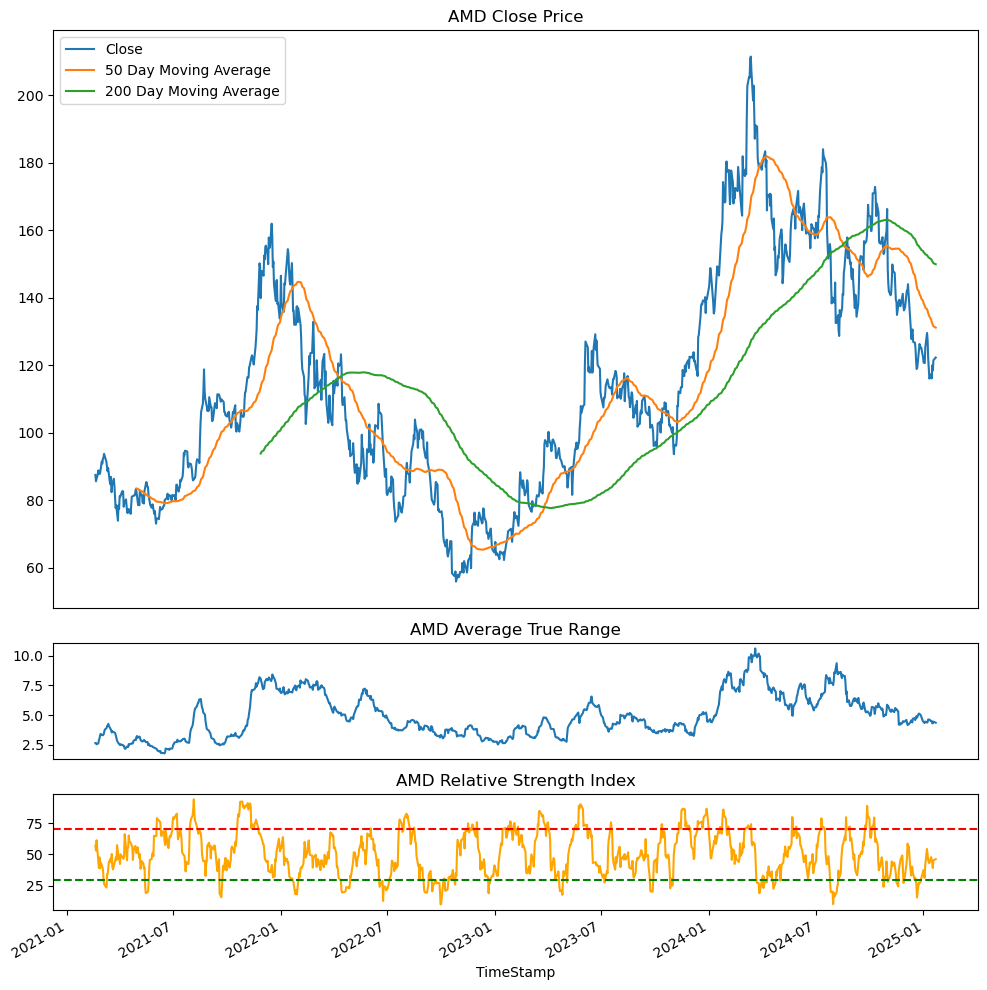

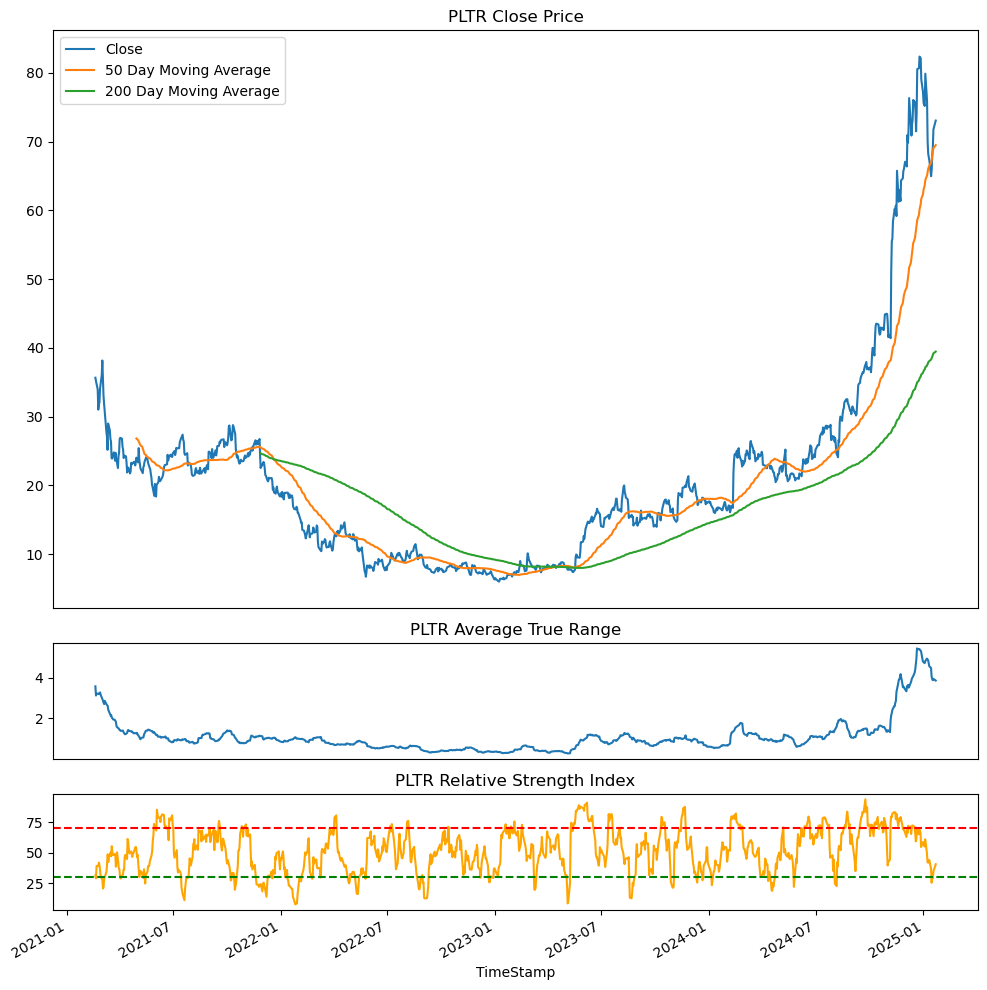

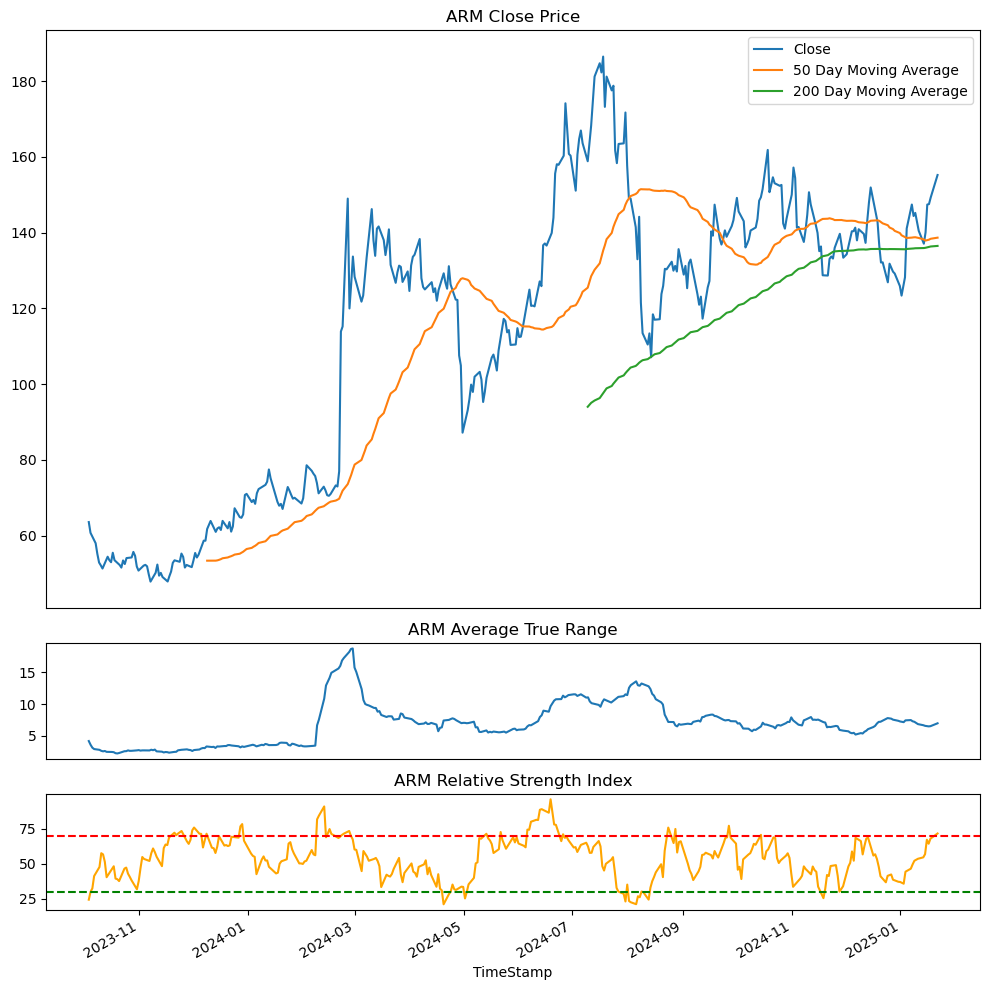

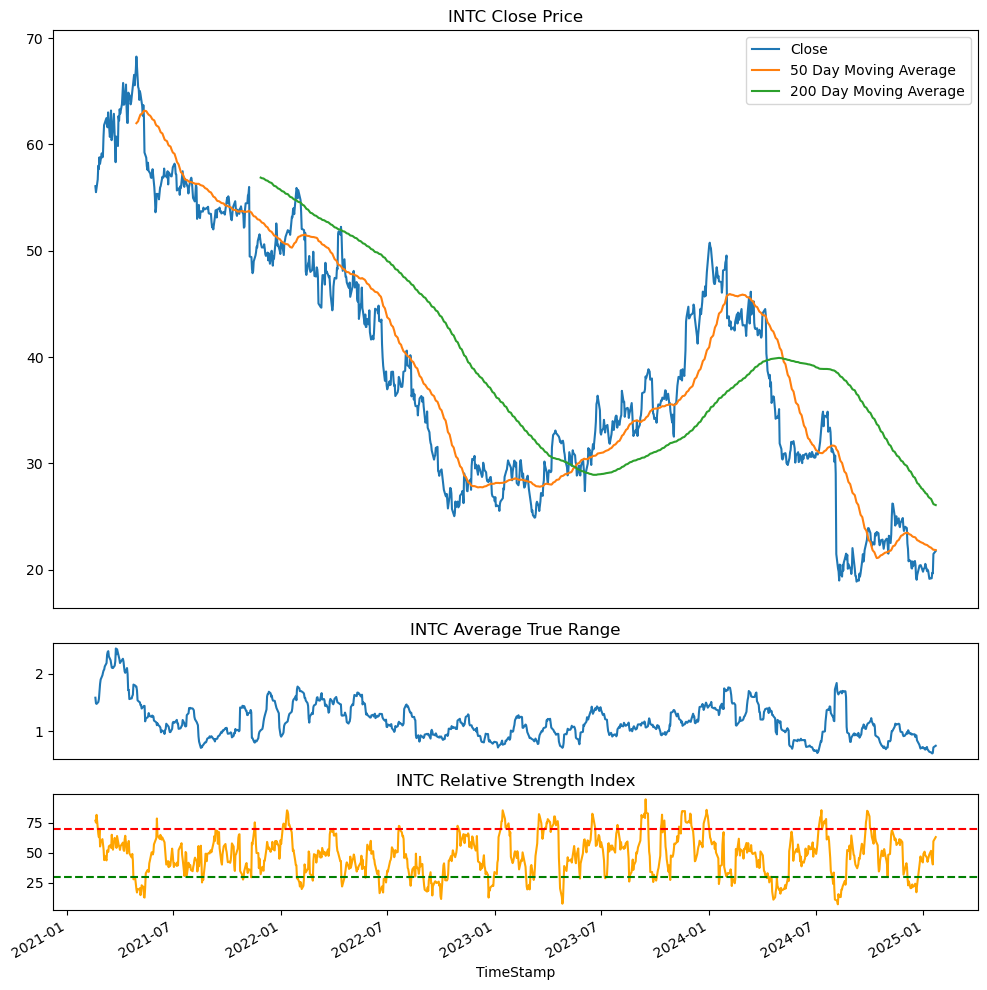

In [18]:
"""
    This script calculates and plots various technical indicators for a list of AI stocks.
    For each stock symbol in `ai_stocks_list`, the following indicators are calculated and plotted:
    1. 50-day moving average
    2. 200-day moving average
    3. Average True Range (ATR)
    4. Relative Strength Index (RSI)
    The script performs the following steps for each stock symbol:
    1. Calculate the 50-day and 200-day moving averages based on the 'Close' prices.
    2. Calculate the Average True Range (ATR) using the 'High', 'Low', and 'Close' prices.
    3. Plot the 'Close' price along with the 50-day and 200-day moving averages.
    4. Plot the ATR.
    5. Calculate and plot the 14-day RSI, including horizontal lines at 30 and 70 to indicate oversold and overbought levels.
    The plots are displayed using Matplotlib with three subplots:
    - The first subplot shows the 'Close' price and moving averages.
    - The second subplot shows the ATR.
    - The third subplot shows the RSI with horizontal lines at 30 and 70.
    Parameters:
    - ai_stocks_list (list): List of stock symbols to process.
    - ai_stocks_df_dict_clean (dict): Dictionary containing cleaned dataframes for each stock symbol.
    Returns:
    - None
"""

for symbol in ai_stocks_list:

    
    # 50 day moving average
    ai_stocks_df_dict_clean[symbol]['50 Day Moving Average'] = ai_stocks_df_dict_clean[symbol]['Close'].rolling(window=50).mean()

    # 200 day moving average
    ai_stocks_df_dict_clean[symbol]['200 Day Moving Average'] = ai_stocks_df_dict_clean[symbol]['Close'].rolling(window=200).mean()

    # Average True Range
    ai_stocks_df_dict_clean[symbol]['High-Low'] = ai_stocks_df_dict_clean[symbol]['High'] - ai_stocks_df_dict_clean[symbol]['Low']
    ai_stocks_df_dict_clean[symbol]['High-PreviousClose'] = np.abs(ai_stocks_df_dict_clean[symbol]['High'] - ai_stocks_df_dict_clean[symbol]['Close'].shift(1))
    ai_stocks_df_dict_clean[symbol]['Low-PreviousClose'] = np.abs(ai_stocks_df_dict_clean[symbol]['Low'] - ai_stocks_df_dict_clean[symbol]['Close'].shift(1))
    ai_stocks_df_dict_clean[symbol]['TR'] = ai_stocks_df_dict_clean[symbol][['High-Low', 'High-PreviousClose', 'Low-PreviousClose']].max(axis=1)
    ai_stocks_df_dict_clean[symbol]['ATR'] = ai_stocks_df_dict_clean[symbol]['TR'].rolling(window=14).mean()

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [5, 1, 1]})

    # Plot the moving averages on the first subplot
    ai_stocks_df_dict_clean[symbol][['Close', '50 Day Moving Average', '200 Day Moving Average']].plot(ax=ax1, title=symbol + ' Close Price')

    # Plot the ATR on the second subplot
    ai_stocks_df_dict_clean[symbol]['ATR'].plot(ax=ax2, title=symbol + ' Average True Range')

   
    # calculate the RSI on a subchart
    # Calculate the 14-day RSI
    delta = ai_stocks_df_dict_clean[symbol]['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))

    # Plot the RSI
    RSI.plot(ax=ax3, title=symbol + ' Relative Strength Index', color='orange')

    #add horizontal lines
    ax3.axhline(30, linestyle='--', color='green')
    ax3.axhline(70, linestyle='--', color='red')

    ax1.xaxis.set_visible(False) 
    ax2.xaxis.set_visible(False)

    plt.tight_layout()
    plt.show()




#### Shorlist using Correlation between stocks

In [22]:

shotlist_stocks = ['NVDA', 'AMZN', 'META', 'TSM', 'ANET', 'AVGO', 'ORCL', 'SAP', 'NOW', 'PLTR']


closing_prices_short_list_stocks = pd.DataFrame({symbol: ai_stocks_df_dict_clean[symbol]['Close'] for symbol in shotlist_stocks})

# Calculate the correlation matrix
correlation_matrix_short_list_stocks = closing_prices_short_list_stocks.corr()

# Define a function to apply color based on correlation value
def color_correlation(val):
    if val > 0.9:
        color = 'color: green'
    elif val < -0.9:
        color = 'color: red'
    else:
        color = ''
    return color

# Apply the function to the correlation matrix
styled_correlation_matrix_short_list_stocks = correlation_matrix_short_list_stocks.style.format(precision=2).applymap(color_correlation)

# Display the styled correlation matrix
styled_correlation_matrix_short_list_stocks

C:\Users\Afiat_Trading\AppData\Local\Temp\ipykernel_50024\3412922373.py:20: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_correlation_matrix_short_list_stocks = correlation_matrix_short_list_stocks.style.format(precision=2).applymap(color_correlation)


#### Count Correlations above 0.9 for each pair of stocks

In [31]:
# Initialize a dictionary to store the count of correlations above 0.9 for each stock
correlation_count = {symbol: 0 for symbol in correlation_matrix.columns}

# Iterate through the correlation matrix
for stock in correlation_matrix.columns:
    for other_stock in correlation_matrix.columns:
        # Ignore self correlations
        if stock != other_stock:
            # Check if the correlation is above 0.9
            if correlation_matrix.loc[stock, other_stock] > 0.9:
                correlation_count[stock] += 1

# Convert the dictionary to a DataFrame for better visualization
correlation_count_df = pd.DataFrame(list(correlation_count.items()), columns=['Stock', 'Count of Correlations > 0.9'])
correlation_count_df.set_index('Stock', inplace=True)
correlation_count_df.sort_values(by='Count of Correlations > 0.9', ascending=False, inplace=True)

# Display the DataFrame
correlation_count_df


Count of Correlations > 0.9
Stock                             
NVDA                             6
AVGO                             6
SAP                              6
ANET                             5
ORCL                             4
META                             3
IBM                              3
MSFT                             3
TSM                              2
NOW                              2
ASML                             0
ADBE                             0
AMZN                             0
GOOGL                            0
ACN                              0
AMD                              0
PLTR                             0
ARM                              0
INTC                             0

In [32]:
# Initialize a dictionary to store the count of correlations above 0.9 for each stock
correlation_count = {symbol: 0 for symbol in closing_prices_short_list_stocks.columns}

# Calculate the correlation matrix for the short list of stocks
correlation_matrix_short_list_stocks = closing_prices_short_list_stocks.corr()

# Iterate through the correlation matrix
for stock in correlation_matrix_short_list_stocks.columns:
    for other_stock in correlation_matrix_short_list_stocks.columns:
        # Ignore self correlations
        if stock != other_stock:
            # Check if the correlation is above 0.9
            if correlation_matrix_short_list_stocks.loc[stock, other_stock] > 0.9:
                correlation_count[stock] += 1

# Convert the dictionary to a DataFrame for better visualization
correlation_count_df = pd.DataFrame(list(correlation_count.items()), columns=['Stock', 'Count of Correlations > 0.9'])
correlation_count_df.set_index('Stock', inplace=True)
correlation_count_df.sort_values(by='Count of Correlations > 0.9', ascending=False, inplace=True)


# Display the DataFrame
correlation_count_df

Count of Correlations > 0.9
Stock                             
SAP                              6
NVDA                             4
AVGO                             4
ORCL                             4
META                             3
ANET                             3
TSM                              2
NOW                              2
AMZN                             0
PLTR                             0

### Auxiliary Logic

In [ ]:
# Logic to plot the closing price of AI stocks

for symbol in ai_stocks_list:
    
    plot = ai_stocks_df_dict_clean[symbol].plot(y='Close', title= symbol +' Close Price' , figsize=(10,5))
    

In [ ]:
# Logic to plot the closing price of market indices

for symbol in market_index_list:
    plot = market_index_list_df_dict_clean[symbol].plot(y='Close', title= symbol +' Close Price' , figsize=(10,5))

In [ ]:
# Plot the candlestick chart for NVDA stock

# Ensure the data is numeric
ai_stocks_df_dict_clean['NVDA'] = ai_stocks_df_dict_clean['NVDA'].apply(pd.to_numeric, errors='coerce')

# Plot the candlestick chart with scales
mpf.plot(ai_stocks_df_dict_clean['NVDA'].iloc[-200:], type='candle', style='charles', title='NVDA Candlestick Chart', ylabel='Price', figsize=(20,10), scale_padding={'left': 0.5, 'right': 0.5, 'top': 0.5, 'bottom': 0.5})

In [ ]:
# Plot based on date range

# Define the date range
start_date = '2022-01-01'
end_date = '2022-12-31'

# Slice the data
sliced_data = ai_stocks_df_dict_clean[ai_stocks_list[0]].loc[start_date:end_date]['Close']

# Plot the sliced data
sliced_data.plot(title=f'{ai_stocks_list[0]} Close Price from {start_date} to {end_date}', figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


